# Название проекта: Анализ причин убытков в маркетинге
**Описание ситуации**:  
Несмотря на вложение больших средств в маркетинг развлекательного приложения Procrastinate Pro+, последние несколько месяцев бизнес постоянно нес убытки.  
У нас в распоряжении есть:  
1) лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27,  
2) выгрузка их покупок за этот период,  
3) статистика рекламных расходов.   

**Описание данных**    
  
Таблица `visits_log_short` (лог сервера с информацией о посещениях сайта):  
  
`User Id` — уникальный идентификатор пользователя  
`Device` — категория устройства пользователя  
`Session start` — дата и время начала сессии  
`Session End` — дата и время окончания сессии  
`Channel` — идентификатор рекламного источника, из которого пришел пользователь  
`Region` - страна пользователя  
  
Таблица `orders_log_short` (информация о заказах):  
  
`User Id` — уникальный id пользователя, который сделал заказ  
`Event Dt` — дата и время покупки  
`Revenue` — выручка  
  
Таблица `costs_short` (информация о затратах на маркетинг):  
  
`Channel` — идентификатор рекламного источника  
`Dt` — дата  
`Costs` — затраты на этот рекламный источник в этот день  

**Цель**:  
установить причины убытков в маркетинге. 
  
**Задачи и ход исследования**:  
1. Загрузим данные и подготовим их к анализу  
2. Создадим функции для расчёта и визуализации метрик LTV, ROI, удержания и конверсии  
3. Проведём ииследовательский анализ данных:  
* изучим, как и какие люди пользуются продуктом,  
* изучим, время начала оплат,  
* поймём, сколько денег приносит каждый клиент,  
* выясним, когда окупается клиент,  
* выявим факторы отрицательно влияющие на привлечение пользователей.  
4. Сделаем выводы.  


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Название-проекта:-Анализ-причин-убытков-в-маркетинге" data-toc-modified-id="Название-проекта:-Анализ-причин-убытков-в-маркетинге-0">Название проекта: Анализ причин убытков в маркетинге</a></span></li><li><span><a href="#Шаг-1.-Загрузим-данные-и-подготовим-их-к-анализу" data-toc-modified-id="Шаг-1.-Загрузим-данные-и-подготовим-их-к-анализу-1">Шаг 1. Загрузим данные и подготовим их к анализу</a></span></li><li><span><a href="#Шаг-2.-Зададим-функции-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии" data-toc-modified-id="Шаг-2.-Зададим-функции-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии-2">Шаг 2. Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии</a></span><ul class="toc-item"><li><span><a href="#Функция-для-создания-пользовательских-профилей" data-toc-modified-id="Функция-для-создания-пользовательских-профилей-2.1">Функция для создания пользовательских профилей</a></span></li><li><span><a href="#Функция-для-расчёта-удержания" data-toc-modified-id="Функция-для-расчёта-удержания-2.2">Функция для расчёта удержания</a></span></li><li><span><a href="#Функция-для-расчёта-конверсии" data-toc-modified-id="Функция-для-расчёта-конверсии-2.3">Функция для расчёта конверсии</a></span></li><li><span><a href="#Функция-для-расчёта-LTV-и-ROI" data-toc-modified-id="Функция-для-расчёта-LTV-и-ROI-2.4">Функция для расчёта LTV и ROI</a></span></li><li><span><a href="#Функция-для-сглаживания-фрейма" data-toc-modified-id="Функция-для-сглаживания-фрейма-2.5">Функция для сглаживания фрейма</a></span></li><li><span><a href="#Функция-для-визуализации-удержания" data-toc-modified-id="Функция-для-визуализации-удержания-2.6">Функция для визуализации удержания</a></span></li><li><span><a href="#Функция-для-визуализации-конверсии" data-toc-modified-id="Функция-для-визуализации-конверсии-2.7">Функция для визуализации конверсии</a></span></li><li><span><a href="#Функция-для-визуализации-LTV-и-ROI" data-toc-modified-id="Функция-для-визуализации-LTV-и-ROI-2.8">Функция для визуализации LTV и ROI</a></span></li></ul></li><li><span><a href="#Шаг-3.-Проведём-исследовательский-анализ-данных" data-toc-modified-id="Шаг-3.-Проведём-исследовательский-анализ-данных-3">Шаг 3. Проведём исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Построим-профили-пользователей.-Определим-минимальную-и-максимальную-дату-привлечения-пользователей." data-toc-modified-id="Построим-профили-пользователей.-Определим-минимальную-и-максимальную-дату-привлечения-пользователей.-3.1">Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.</a></span></li><li><span><a href="#Посмотрим-из-каких-стран,-устройств-и-каналов-приходят-посетители-и-откуда-больше-всего-платящих-пользователей." data-toc-modified-id="Посмотрим-из-каких-стран,-устройств-и-каналов-приходят-посетители-и-откуда-больше-всего-платящих-пользователей.-3.2">Посмотрим из каких стран, устройств и каналов приходят посетители и откуда больше всего платящих пользователей.</a></span></li><li><span><a href="#Вывод-:" data-toc-modified-id="Вывод-:-3.3">Вывод :</a></span></li><li><span><a href="#Установим-момент-и-горизонт-анализа-данных." data-toc-modified-id="Установим-момент-и-горизонт-анализа-данных.-3.4">Установим момент и горизонт анализа данных.</a></span></li><li><span><a href="#Посмотрим-общие-затраты-на-маркетинг." data-toc-modified-id="Посмотрим-общие-затраты-на-маркетинг.-3.5">Посмотрим общие затраты на маркетинг.</a></span></li><li><span><a href="#Посмотрим,-сколько-в-среднем-стоило-привлечение-одного-покупателя-из-каждого-источника" data-toc-modified-id="Посмотрим,-сколько-в-среднем-стоило-привлечение-одного-покупателя-из-каждого-источника-3.6">Посмотрим, сколько в среднем стоило привлечение одного покупателя из каждого источника</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.7">Вывод:</a></span></li><li><span><a href="#Оценим-окупаемость-рекламы-для-привлечения-пользователей" data-toc-modified-id="Оценим-окупаемость-рекламы-для-привлечения-пользователей-3.8">Оценим окупаемость рекламы для привлечения пользователей</a></span><ul class="toc-item"><li><span><a href="#Проанализируем-общую-окупаемость-рекламы" data-toc-modified-id="Проанализируем-общую-окупаемость-рекламы-3.8.1">Проанализируем общую окупаемость рекламы</a></span></li><li><span><a href="#Проанализируем-окупаемость-рекламы-с-разбивкой-по-устройствам" data-toc-modified-id="Проанализируем-окупаемость-рекламы-с-разбивкой-по-устройствам-3.8.2">Проанализируем окупаемость рекламы с разбивкой по устройствам</a></span></li><li><span><a href="#Проанализируем-окупаемость-рекламы-с-разбивкой-по-странам" data-toc-modified-id="Проанализируем-окупаемость-рекламы-с-разбивкой-по-странам-3.8.3">Проанализируем окупаемость рекламы с разбивкой по странам</a></span></li><li><span><a href="#Проанализируем-окупаемость-рекламы-с-разбивкой-по-рекламным-каналам" data-toc-modified-id="Проанализируем-окупаемость-рекламы-с-разбивкой-по-рекламным-каналам-3.8.4">Проанализируем окупаемость рекламы с разбивкой по рекламным каналам</a></span></li></ul></li><li><span><a href="#Построим-и-изучим-графики-конверсии-и-удержания-с-разбивкой-по-устройствам,-странам,-рекламным-каналам." data-toc-modified-id="Построим-и-изучим-графики-конверсии-и-удержания-с-разбивкой-по-устройствам,-странам,-рекламным-каналам.-3.9">Построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.</a></span><ul class="toc-item"><li><span><a href="#Строим-графики-удержания" data-toc-modified-id="Строим-графики-удержания-3.9.1">Строим графики удержания</a></span></li><li><span><a href="#Строим-графики-коверсии" data-toc-modified-id="Строим-графики-коверсии-3.9.2">Строим графики коверсии</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.9.3">Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Шаг-4.-Выводы" data-toc-modified-id="Шаг-4.-Выводы-4">Шаг 4. Выводы</a></span></li></ul></div>

# Шаг 1. Загрузим данные и подготовим их к анализу
Загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа. Проверим, что тип данных в каждой колонке — правильный.


In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:,.4f}'.format)

import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina' # Улучшение четкости изображения

import warnings
warnings.filterwarnings('ignore') # уберём предупреждения

# Форматирование для типа float
%precision %.4f

'%.4f'

In [2]:
visits = pd.read_csv('visits_info_short.csv')
orders = pd.read_csv('orders_info_short.csv')
costs = pd.read_csv('costs_info_short.csv')

display(visits.head())
display(orders.head())
display(costs.head())

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52   4.9900
1  174361394180  2019-05-01 12:24:04   4.9900
2  529610067795  2019-05-01 11:34:04   4.9900
3  319939546352  2019-05-01 15:34:40   4.9900
4  366000285810  2019-05-01 13:59:51   4.9900

dt   Channel    costs
0  2019-05-01  FaceBoom 113.3000
1  2019-05-02  FaceBoom  78.1000
2  2019-05-03  FaceBoom  85.8000
3  2019-05-04  FaceBoom 136.4000
4  2019-05-05  FaceBoom 122.1000

In [3]:
# Подправим названия столбцов
for df in [visits,orders,costs]: 
    df.columns = [x.lower().replace(' ', '_') for x in df.columns]    

Посмотрим на типы данных и пропуски во всех датафреймах

In [4]:
for df in [visits,orders,costs]:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   

Пропусков нет. Типы данных некорректны в столбцах с датами. Изменим тип данных на datetime.

In [5]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

for df in [visits,orders,costs]: # Проверим
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

Типы данных изменились. В таблице costs в столбце dt тип данных date.

Проверим отсутствие дубликатов.

In [6]:
for df in [visits,orders,costs]: 
    display(df.duplicated().sum())

0

0

0

Отлично, дубликатов нет.

# Шаг 2. Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии

## Функция для создания пользовательских профилей

Профиль пользователя будет отражать:  
`user_id` - идентификатор пользователя  
`first_ts` - дату первого посещения  
`channel` - канал привлечения  
`device` - устройство, с которого был первый вход  
`region` - регион  
`dt` - дату события  
`month` - месяц события  
`payer` - является ли пользователь плательщиком  
`acquisition_cost` - стоимость привлечения пользователя  

In [7]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )
    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


## Функция для расчёта удержания

In [8]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

## Функция для расчёта конверсии


In [9]:

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

## Функция для расчёта LTV и ROI

In [10]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

## Функция для сглаживания фрейма


In [11]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

## Функция для визуализации удержания

In [12]:

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

## Функция для визуализации конверсии


In [13]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Функция для визуализации LTV и ROI

In [14]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# Шаг 3. Проведём исследовательский анализ данных

## Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

In [15]:
# Строим профили пользователей, используя все таблицы и функцию get_profiles() 
events = None  # других событий нет, None — чтобы не «сломать» get_profiles()

profiles = get_profiles(visits, orders, events, costs)
print(profiles.head(5))

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True            1.0882  
1  2019-07-09 2019-07-01  False            1.1072  
2  2019-10-01 2019-10-01  False            0.0000  
3  2019-08-22 2019-08-01  False            0.9882  
4  2019-10-02 2019-10-01  False            0.2308  


Определим минимальную и максимальную дату привлечения пользователей.

In [16]:
min_analysis_date, max_analysis_date = profiles['dt'].min(), profiles['dt'].max()
display(min_analysis_date, max_analysis_date)

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

## Посмотрим из каких стран, устройств и каналов приходят посетители и откуда больше всего платящих пользователей.

United States    100002
UK                17575
France            17450
Germany           14981
Name: region, dtype: int64

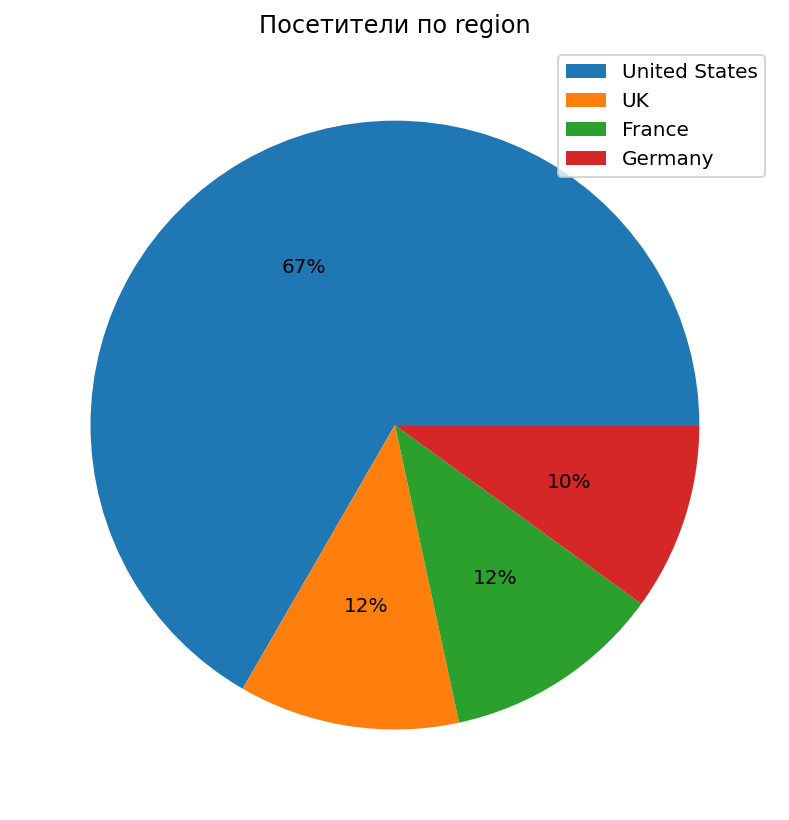

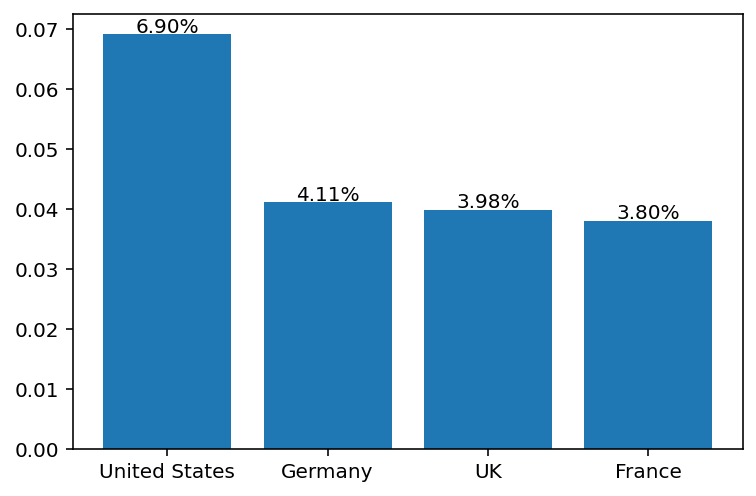

iPhone     54479
Android    35032
PC         30455
Mac        30042
Name: device, dtype: int64

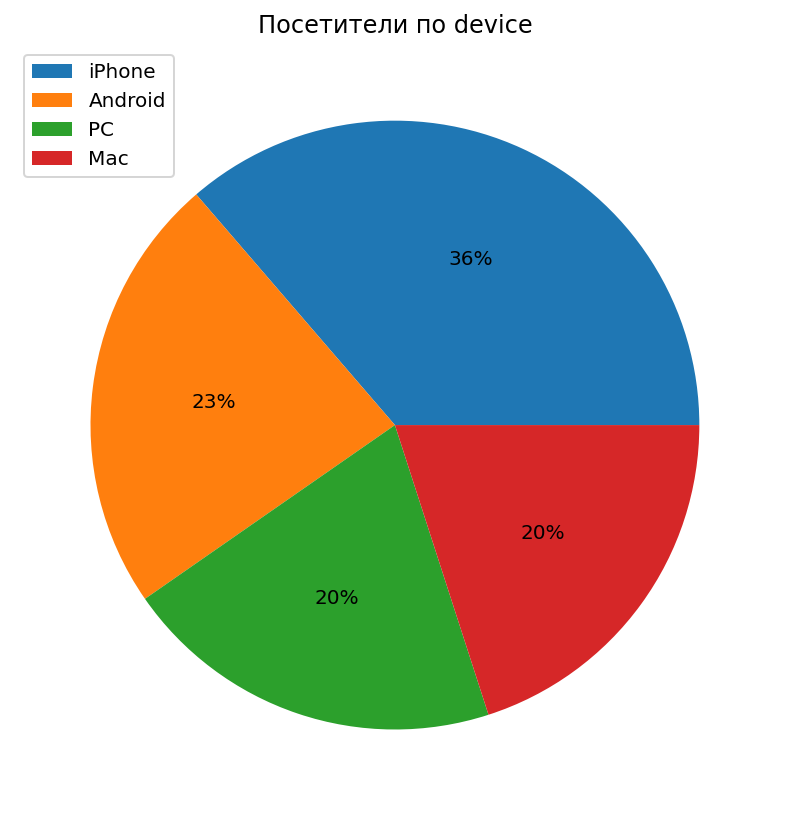

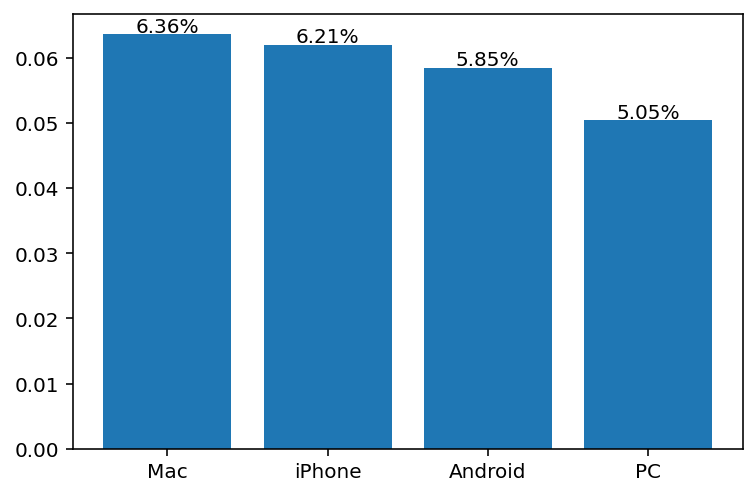

organic               56439
FaceBoom              29144
TipTop                19561
OppleCreativeMedia     8605
WahooNetBanner         8553
LeapBob                8553
RocketSuperAds         4448
MediaTornado           4364
YRabbit                4312
AdNonSense             3880
lambdaMediaAds         2149
Name: channel, dtype: int64

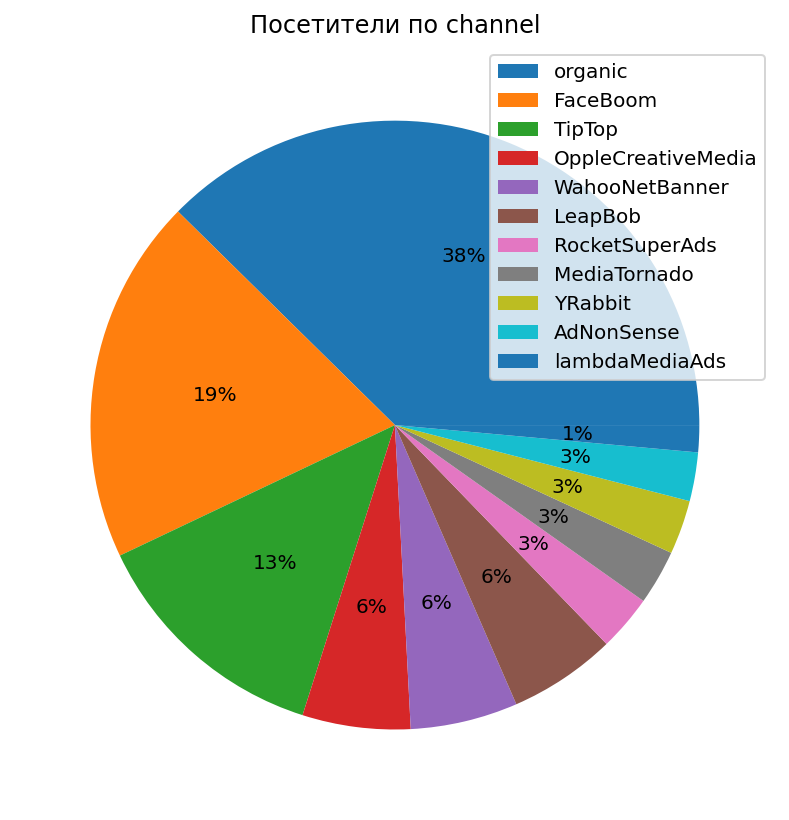

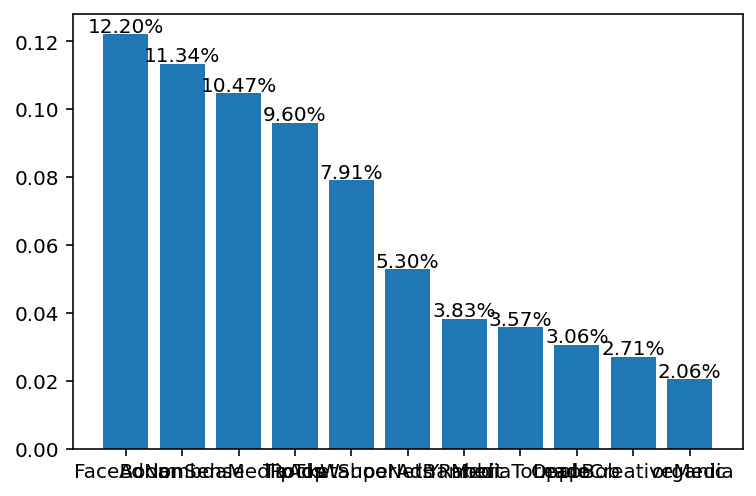

In [17]:
for col in ['region', 'device', 'channel']:
    
    # Выводим информацию о количестве посетителей по каждому признаку
    display(profiles[col].value_counts().sort_values(ascending=False))
    
    # Круговая диаграмма количества посетителей по каждому признаку
    profiles[col].value_counts().sort_values(ascending=False).plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(7, 7), title=f'Посетители по {col}')
    plt.show()
    
    # Выводим информацию о доли плательщиков 
    profiles_by_col = (
        profiles.groupby(col).
        agg({'payer': 'mean'}).
        sort_values(by='payer', ascending=False).
        reset_index()
    )
    
    # Таблица    
    display(profiles_by_col.style.format({'payer':'{:.2%}'}))
    
    # Строим барплот
    xs = profiles_by_col[col]
    ys = profiles_by_col['payer']
    plt.bar(xs,ys)
    # Добавим подписи
    for x,y in zip(xs,ys):
        label = "{:.2%}".format(y)
        plt.annotate(label, # значение
                 (x,y), # координаты значения
                 textcoords="offset points", # способ расположения текста
                 xytext=(0,1), # растояние от текста до точки (x,y)
                 ha='center') # горизонтальное выравнивание
    
    plt.show()
    

## Вывод : 
1) подовляющая доля клиентов из США, плательщиков также больше из США, чем из других стран;  
2) распределение клиентов по устройствам примерно одинаковое, но больше всего пользователей заходят в приложение через iPhone, среди владельцев Мас и iPhone немного больше платящих, чем среди других устройств;  
3) больше всего пользователей привлекли каналы: organic, FaceBoom и TipTop, однако максимальное количество платящих клиентов пришли через FaceBoom (12.20%), AdNonSense (11.34%) и lambdaMediaAds (10.47%).

## Установим момент и горизонт анализа данных.  

Момент анализа - это момент времени, в который исследуются данные. Пусть это будет следующий день после максимальной даты (max_analysis_date + 1).
Горизонт анализа - это максимальный лайфтайм, который анализируется. Пусть будет 14 дней.

In [18]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа
display('момент анализа', observation_date)
display('горизонт анализа', horizon_days)

'момент анализа'

datetime.date(2019, 11, 1)

'горизонт анализа'

14

## Посмотрим общие затраты на маркетинг. 

In [19]:
# Общая сумма расходов на маркетинг за всё время
costs['costs'].sum()

105497.30000000002

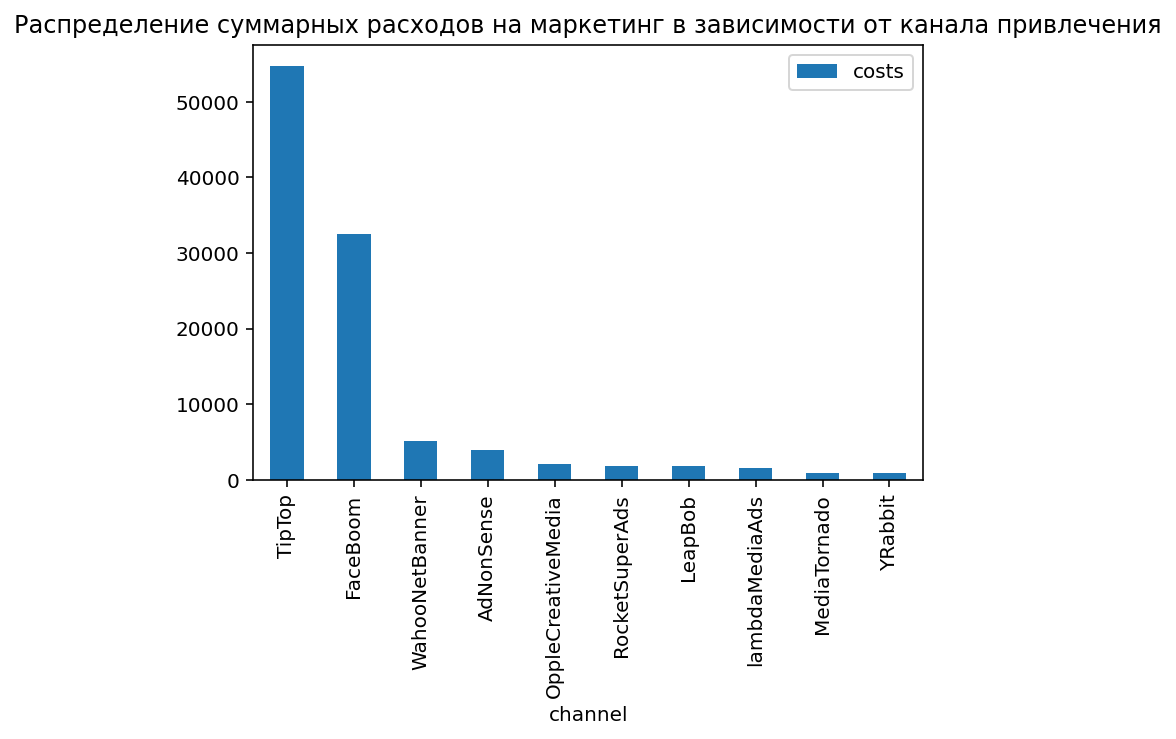

In [20]:
# Выясним, как траты распределены по источникам
costs.groupby(['channel']).agg({'costs':'sum'}).sort_values(by='costs', ascending=False)
costs.groupby(['channel']).agg({'costs':'sum'}).sort_values(by='costs', ascending=False).plot(kind='bar',
                                                                                              title='Распределение суммарных расходов на маркетинг в зависимости от канала привлечения')
plt.show()

Как видим более половины всех расходов на маркетинг ушло на канал TipTop. Отметим также, что два канала TipTop и FaceBoom значительно ушли "в отрыв" по расходам от всех остальных.

Посмотрим, какие расходы были в каждом месяце:

In [21]:
costs['month'] = pd.DatetimeIndex(costs['dt']).month # Добавим столбец с месяцами
display(costs.groupby(['month']).agg({'costs':'sum'}).sort_values(by='costs', ascending=False)) # Таблица расходов по месяцам
costs=costs.drop(columns='month') # Удалим столбец с месяцами - вернём как было

costs
month            
9     22,441.3400
10    20,882.4150
8     20,657.8700
7     16,447.0600
6     15,090.0450
5      9,978.5700

Видим, что расходы на маркетинг значительно разнятся по месяцам: в сентябре расходы достигли максимума и более чем в 2 раза превысили расходы в мае. В целом видна тенденция роста с 5 по 9 месяцы и небольшое снижение в 10.

Визуализируем изменение общей суммы расходов на маркетинг за каждый месяц и их распределение по источникам.

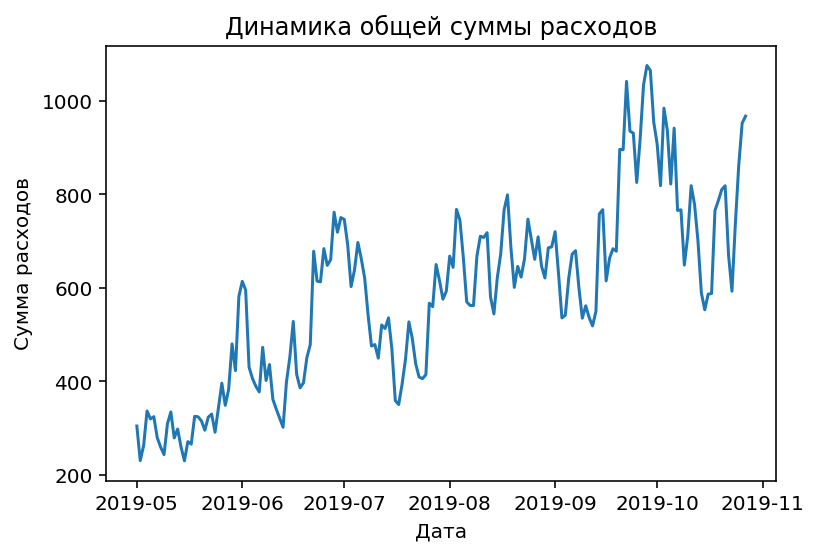

In [22]:
costs.groupby('dt').agg({'costs':'sum'}).plot(title='Динамика общей суммы расходов',
                                              xlabel='Дата', 
                                              ylabel='Cумма расходов', 
                                             legend=False)
plt.show()

Видим рост расходов на маркетинг с резкими пиками в начале каждого месяца.  
Посмотрим динамику расходов по каналам

In [23]:
costs['channel'].unique() # Список каналов

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

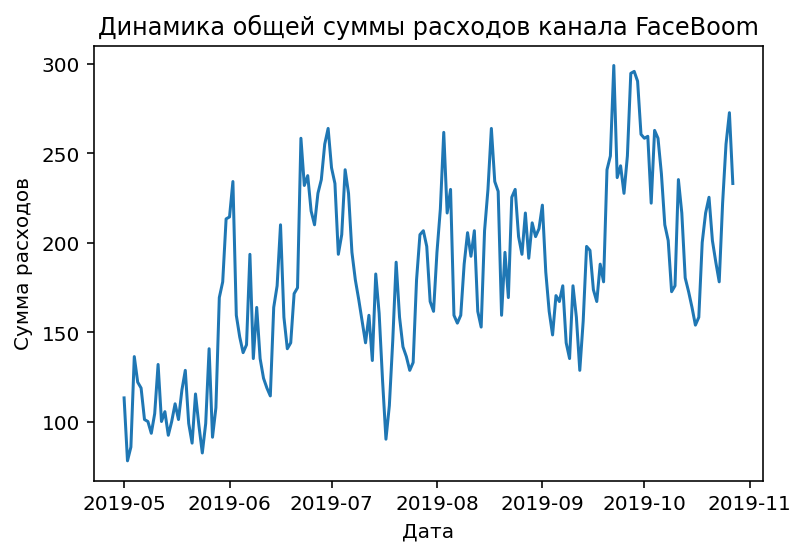

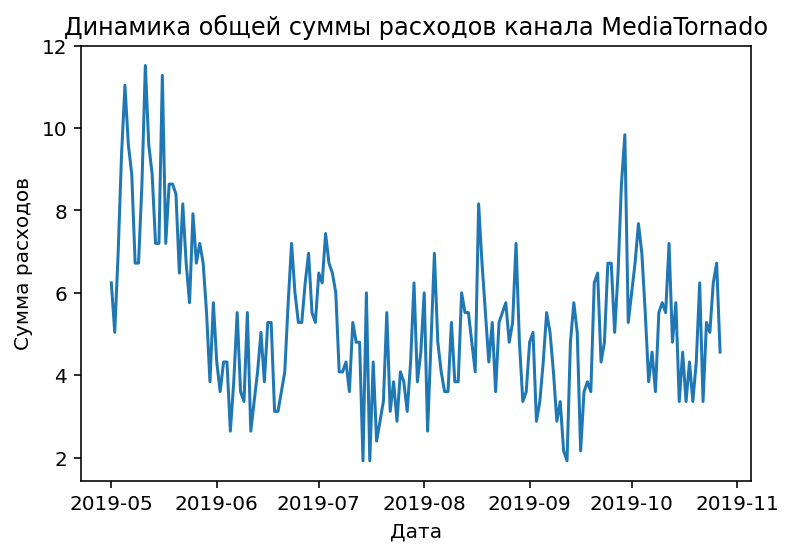

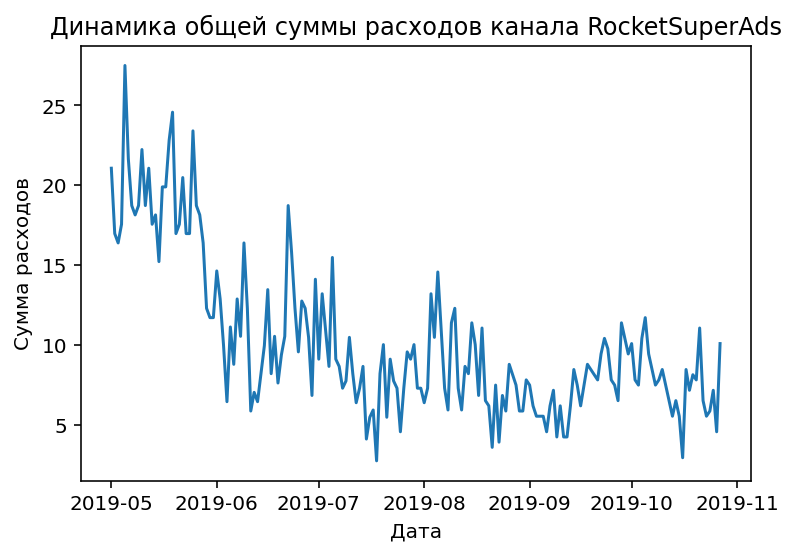

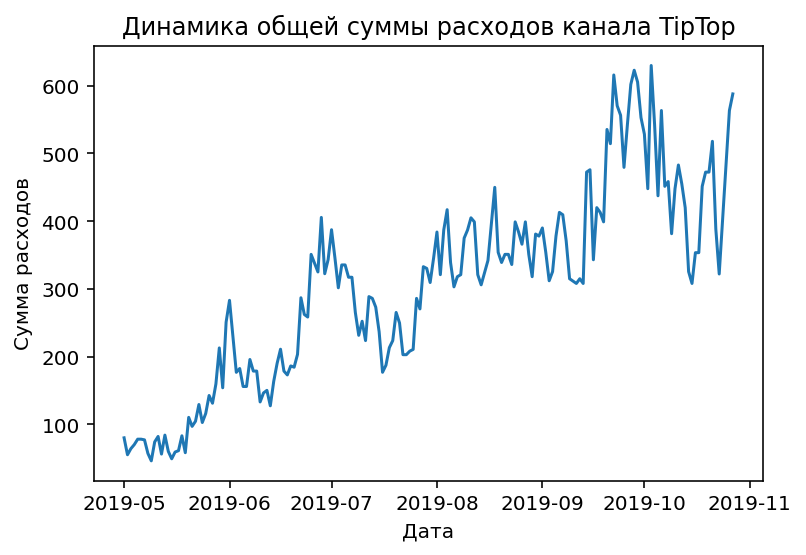

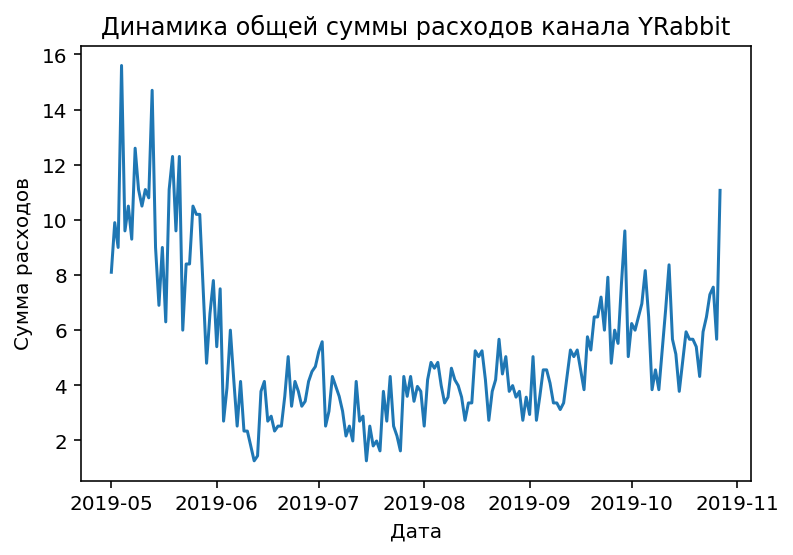

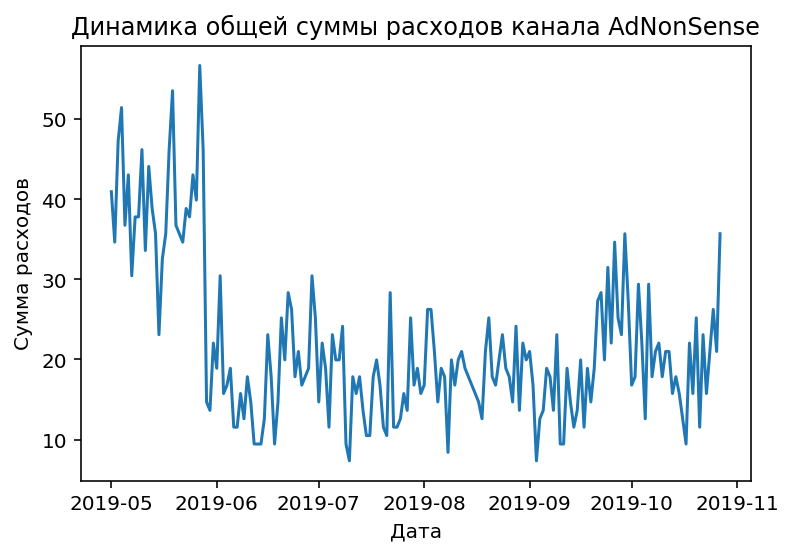

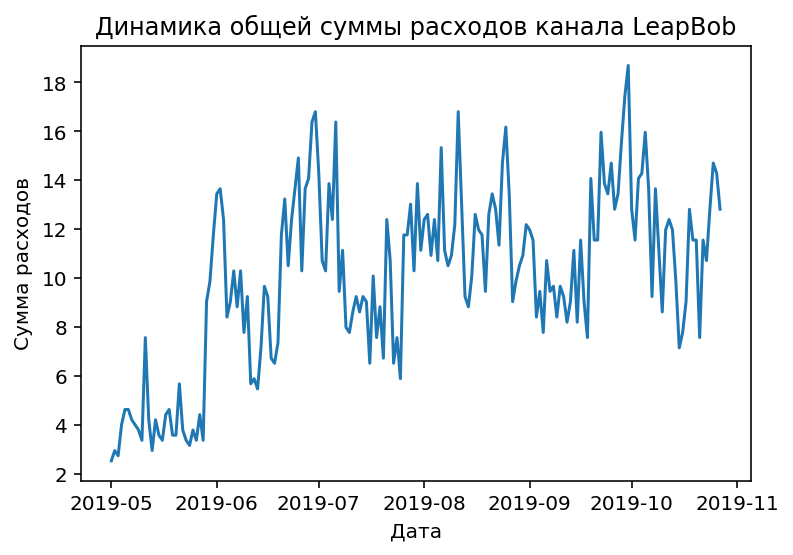

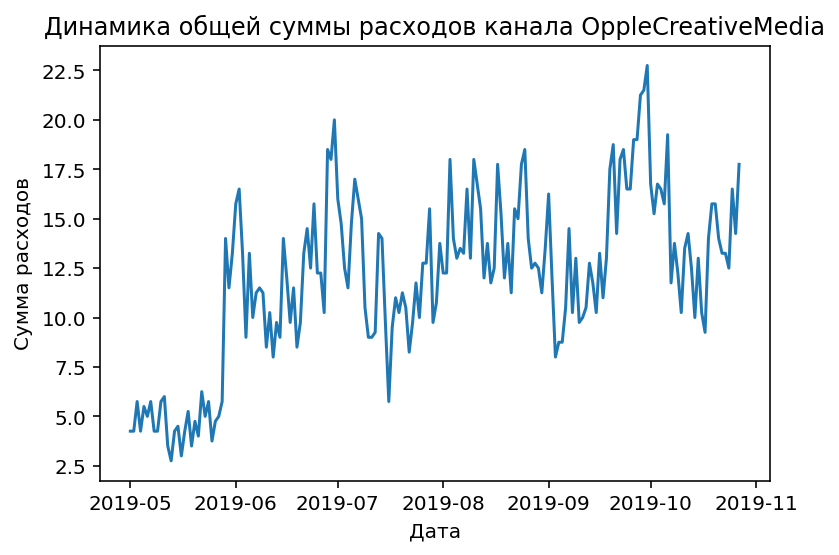

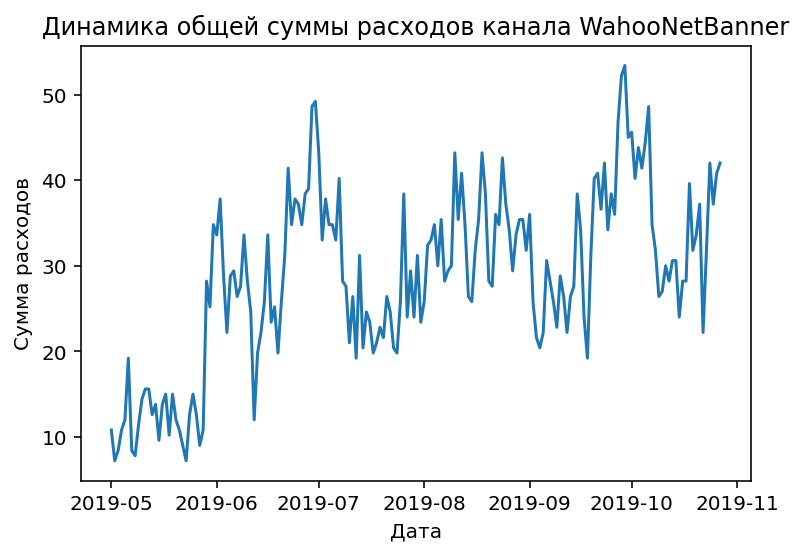

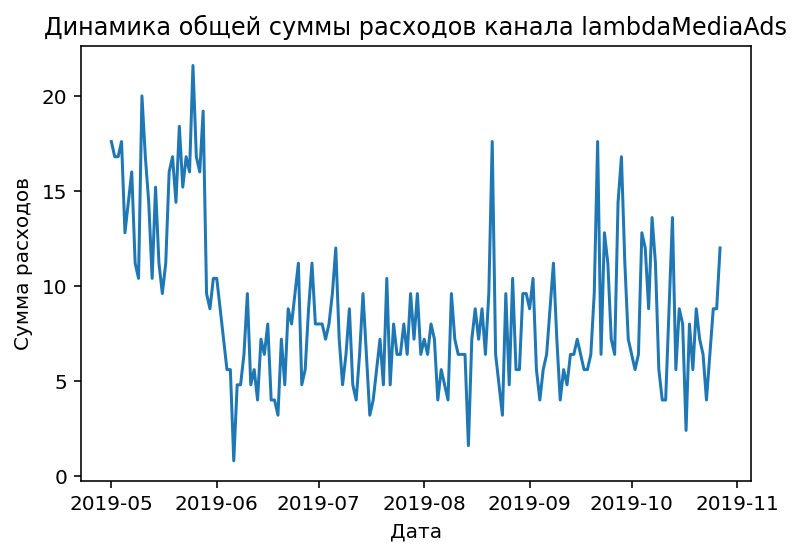

In [24]:
# Строим линейный график динамики расходов для каждого канала
for channel in ['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds']:
    costs.query('channel == @channel').groupby('dt').agg({'costs':'sum'}).plot(title=f'Динамика общей суммы расходов канала {channel}',
                                                                               xlabel='Дата', 
                                                                               ylabel='Cумма расходов', 
                                                                               legend=False)
    plt.show()

`FaceBoom` - рост расходов каждый месяц,  
`MediaTornado` - высокие расходы в мае, далее стабильно   
`RocketSuperAds` - высокие расходы в мае, далее стабильно  
`TipTop` - рост расходов каждый месяц,   
`YRabbit` - высокие расходы в мае, далее стабильно, рост в октябре  
`AdNonSense` - высокие расходы в мае, далее стабильно  
`LeapBob` - рост расходов каждый месяц,  
`OppleCreativeMedia` - рост расходов каждый месяц,  
`WahooNetBanner` - рост расходов каждый месяц,  
`lambdaMediaAds` - высокие расходы в мае, далее стабильно  
  
Как видим, каналы в зависимости от динамики расходов можно условно разделить на две группы: **ежемесячный рост** (*`FaceBoom`, `TipTop`, `LeapBob`, `OppleCreativeMedia`, `WahooNetBanner`*) и **высокие расходы в начале периода со снижением и последующей стабилизацией** (*`MediaTornado`, `RocketSuperAds`, `YRabbit, `AdNonSense`, `lambdaMediaAds`*).

## Посмотрим, сколько в среднем стоило привлечение одного покупателя из каждого источника

Сколько в среднем стоило привлечение одного покупателя из каждого источника? Для этого рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика, используя профили пользователей. При этом исключим бесплатный трафик, т.к. он занижает среднюю стоимость платного трафика.

In [25]:
# средний CAC на одного пользователя для всего проекта
float(profiles.query('channel!="organic"')['acquisition_cost'].mean())

1.1275

In [26]:
# средний CAC на одного пользователя для каждого источника трафика
profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', 
                                                                          ascending=False)

acquisition_cost
channel                             
TipTop                        2.7990
FaceBoom                      1.1133
AdNonSense                    1.0081
lambdaMediaAds                0.7248
WahooNetBanner                0.6022
RocketSuperAds                0.4121
OppleCreativeMedia            0.2500
YRabbit                       0.2190
MediaTornado                  0.2187
LeapBob                       0.2102
organic                       0.0000

Самые дорогие пользователи приходят с каналов: TipTop, FaceBoom. Стоимость каждого привлечённого пользователя более среднего значения 1.1275. Причём, канал TipTop более чем в 2,5 раза дороже FaceBoom.

## Вывод: 
1) за весь исследуемый период было потрачено на рекламу - 105497.3, расходы росли каждый месяц и достигли максимума в сентябре, больше всего маркетинговых расходов пришлось на каналы - TipTop и FaceBoom;  
2) пользователи, привлечённые с канала TipTop - самые дорогие, средние расходы на привлечение из этого канала превышают более чем в 2,5 раза следующие каналы по дороговизне. Такое положение дел может быть оправданно только более чем 2,5 раза высоким привлечением платящих клиентов.  

## Оценим окупаемость рекламы для привлечения пользователей


Мы смотрим данные 1-го ноября 2019 года и в организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей, значит, горизонт анализа 14 дней.  
  
Исключим органический трафик со всех таблиц

In [27]:
profiles = profiles.query('channel!="organic"')
costs = costs.query('channel!="organic"')
visits = visits.query('channel!="organic"')

### Проанализируем общую окупаемость рекламы

Проанализируем общую окупаемость рекламы. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [28]:
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles,
                                                         orders,
                                                         observation_date,
                                                         horizon_days,
                                                         dimensions=[])
display(ltv)
display(roi)

cohort_size    0.0    1.0    2.0    3.0    4.0    5.0    6.0  \
cohort                                                                    
All users        88644 0.3456 0.4358 0.5045 0.5611 0.6114 0.6544 0.6941   

             7.0    8.0    9.0   10.0   11.0   12.0   13.0  
cohort                                                      
All users 0.7298 0.7646 0.7967 0.8262 0.8521 0.8781 0.9020

cohort_size    cac    0.0    1.0    2.0    3.0    4.0    5.0  \
cohort                                                                    
All users        88644 1.1178 0.3092 0.3898 0.4513 0.5020 0.5470 0.5854   

             6.0    7.0    8.0    9.0   10.0   11.0   12.0   13.0  
cohort                                                             
All users 0.6210 0.6529 0.6840 0.7127 0.7391 0.7623 0.7856 0.8070

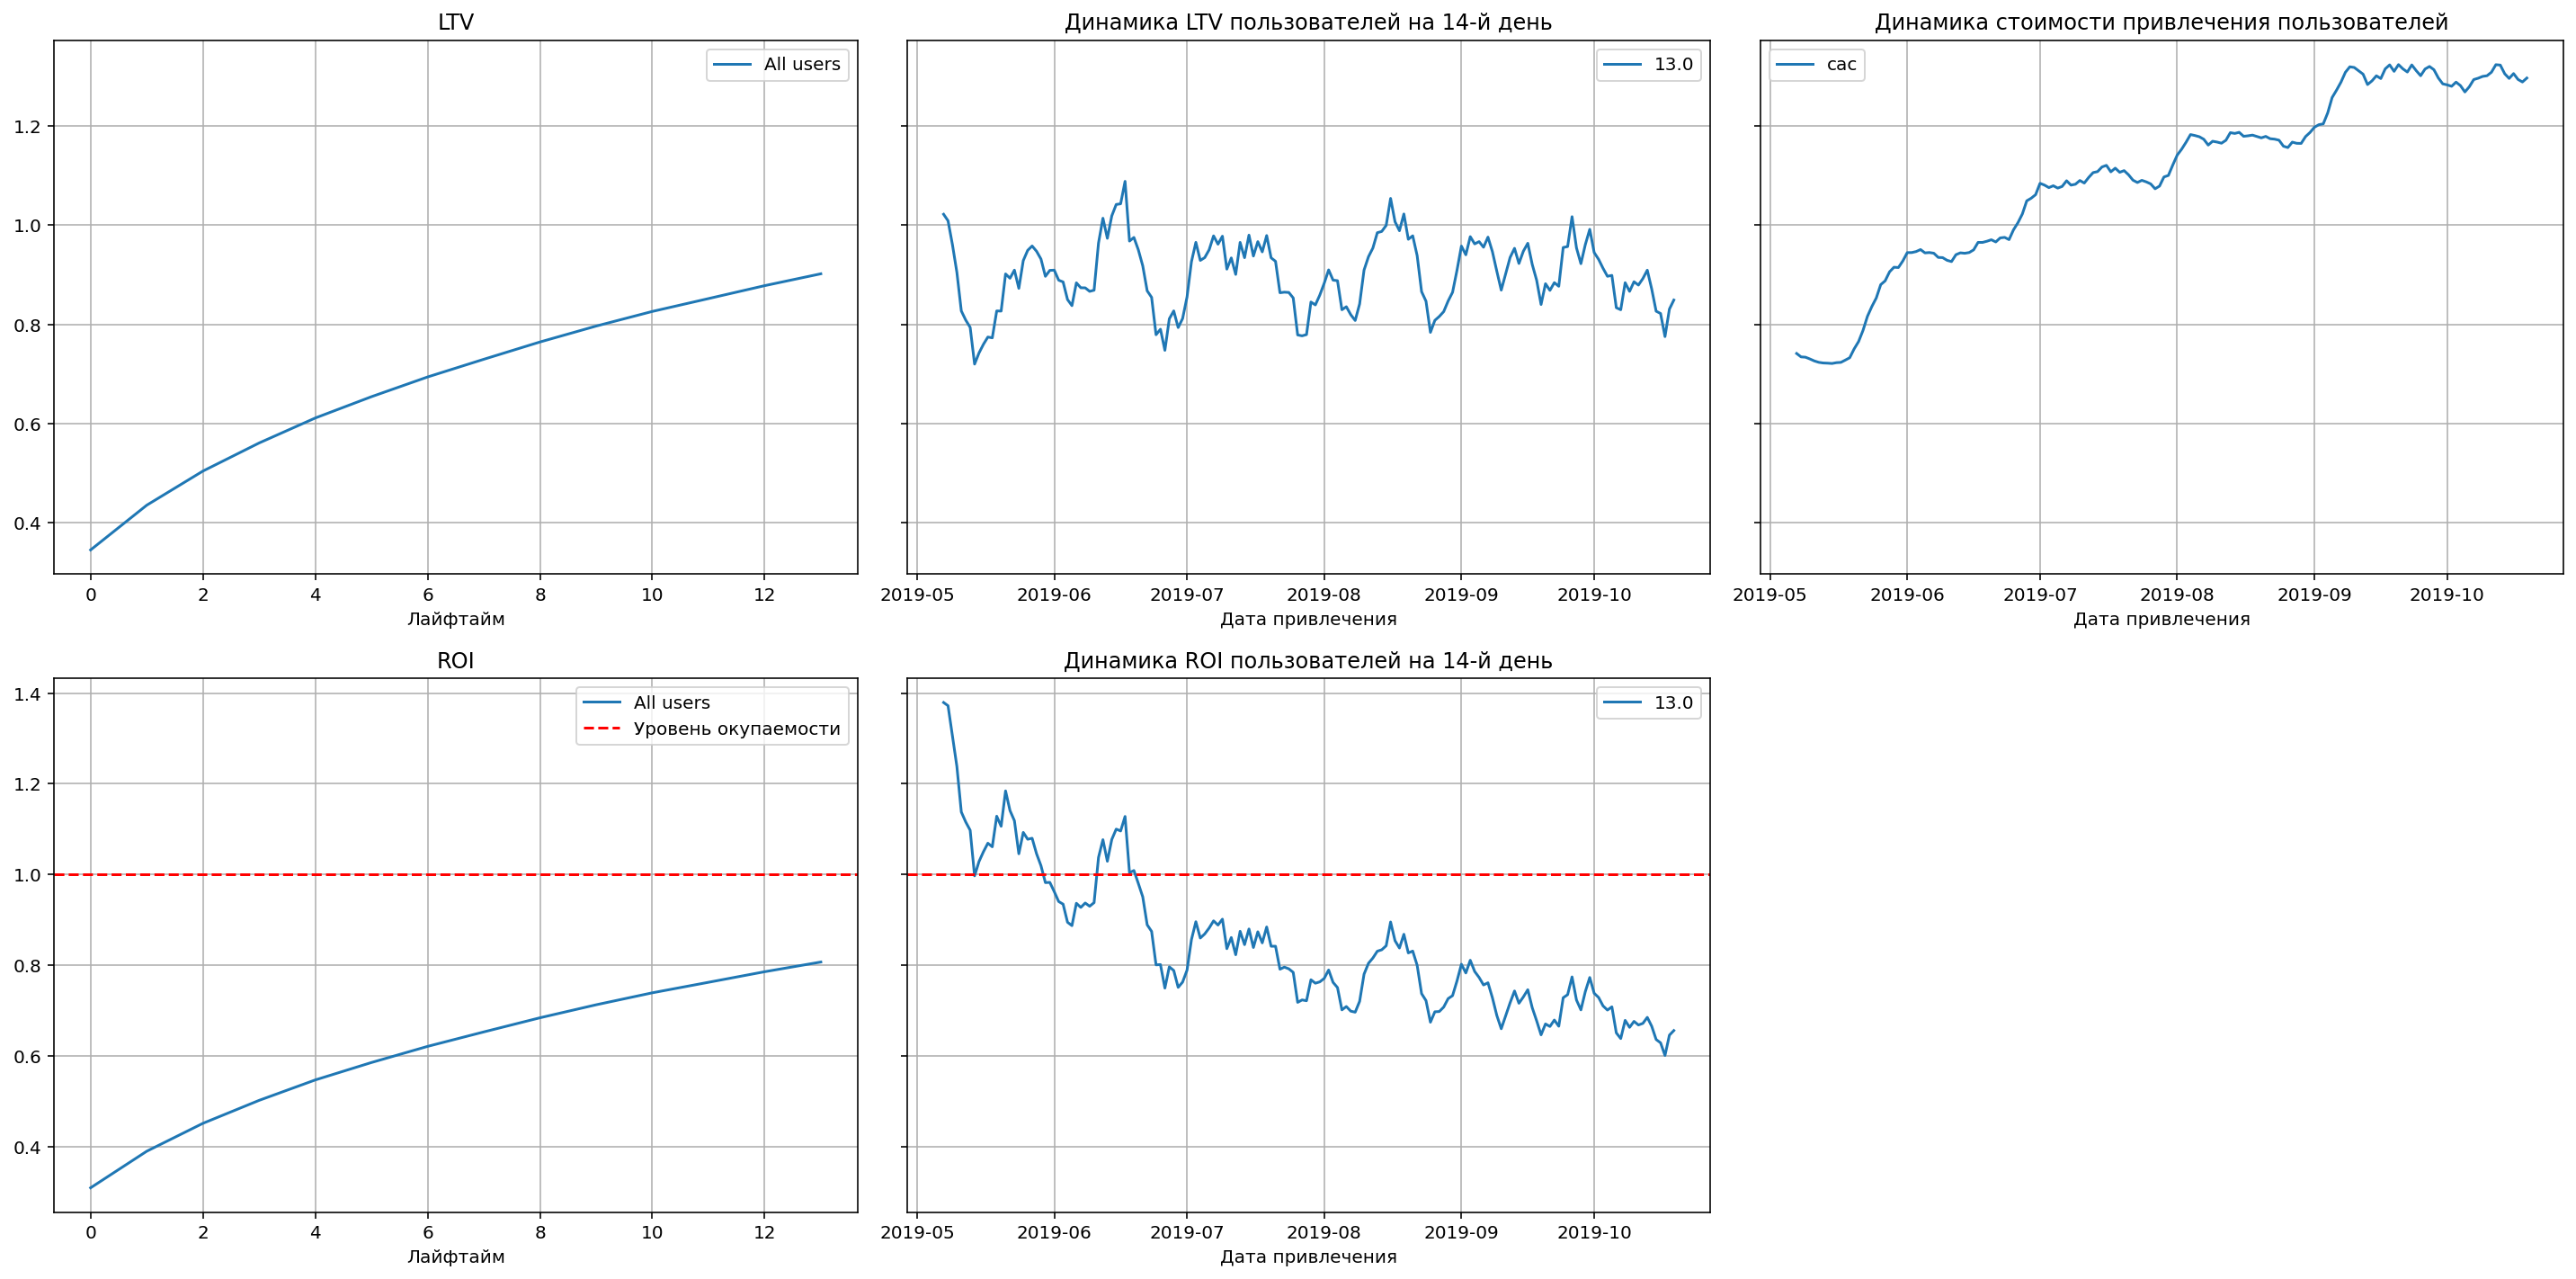

In [29]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

Итак, при заданном горизонте в 14 дней и моменте анализа 01.11.2019 размер выборки составил 88644 пользователей без органического трафика. Средняя стоимость привлечения одного пользователя - 1.1178. Несмотря на рост LTV каждый лайфтайм, LTV даже на 14-ый день использования приложения не превышает затраты, как следствие, ROI ниже 1 на всём промежутке анализа.  
Динамика LTV на 14-й день практически не менялась на протяжении рассматриваемого периода. Значит, каждый платный пользователь приносил примерно одинаковую сумму дохода компании, и маркетинг не смог привести более дорогих клиентов.  
Динамика ROI на 14-й день снижается ежемесячно.  
Динамика стоимости привлечения пользователей равномерно росла с начала июня по сентябрь. Возможно, это связано с изменениями в маркетинговой стратегии.  
В целом видно, что маркетинг не приносит пользы, затраты больше, чем выгода. Однако так было не всегда: на графике динамики ROI на 14 день, видно, что до конца июня и в первой половине июля маркетинг окупался. Необходимо проанализировать окупаемость рекламы в разных направлениях, чтобы найти возможные причины снижения прибыли.

### Проанализируем окупаемость рекламы с разбивкой по устройствам

In [30]:
result_raw_device, ltv_device, ltv_history_device, roi_device, roi_history_device = get_ltv(profiles,
                                                                                            orders,
                                                                                            observation_date,
                                                                                            horizon_days,
                                                                                            dimensions=['device'])
display(ltv_device)
display(roi_device)

cohort_size    0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0  \
device                                                                         
Android        20683 0.3392 0.4308 0.5002 0.5552 0.6082 0.6614 0.6998 0.7386   
Mac            17747 0.3822 0.4802 0.5501 0.6051 0.6512 0.6858 0.7218 0.7529   
PC             18128 0.2774 0.3615 0.4304 0.4857 0.5396 0.5816 0.6312 0.6620   
iPhone         32086 0.3679 0.4563 0.5239 0.5832 0.6321 0.6736 0.7107 0.7497   

           8.0    9.0   10.0   11.0   12.0   13.0  
device                                             
Android 0.7740 0.8069 0.8339 0.8561 0.8880 0.9121  
Mac     0.7910 0.8254 0.8574 0.8844 0.9046 0.9305  
PC      0.7010 0.7294 0.7615 0.7887 0.8121 0.8362  
iPhone  0.7800 0.8122 0.8404 0.8674 0.8944 0.9170

cohort_size    cac    0.0    1.0    2.0    3.0    4.0    5.0    6.0  \
device                                                                         
Android        20683 1.0198 0.3326 0.4224 0.4905 0.5445 0.5964 0.6486 0.6862   
Mac            17747 1.2762 0.2995 0.3763 0.4311 0.4741 0.5103 0.5374 0.5656   
PC             18128 0.7927 0.3499 0.4561 0.5430 0.6126 0.6807 0.7337 0.7963   
iPhone         32086 1.2770 0.2881 0.3573 0.4103 0.4567 0.4950 0.5274 0.5565   

           7.0    8.0    9.0   10.0   11.0   12.0   13.0  
device                                                    
Android 0.7243 0.7590 0.7912 0.8177 0.8395 0.8708 0.8944  
Mac     0.5899 0.6198 0.6467 0.6718 0.6930 0.7088 0.7291  
PC      0.8350 0.8843 0.9201 0.9606 0.9949 1.0244 1.0548  
iPhone  0.5870 0.6108 0.6360 0.6581 0.6793 0.7004 0.7181

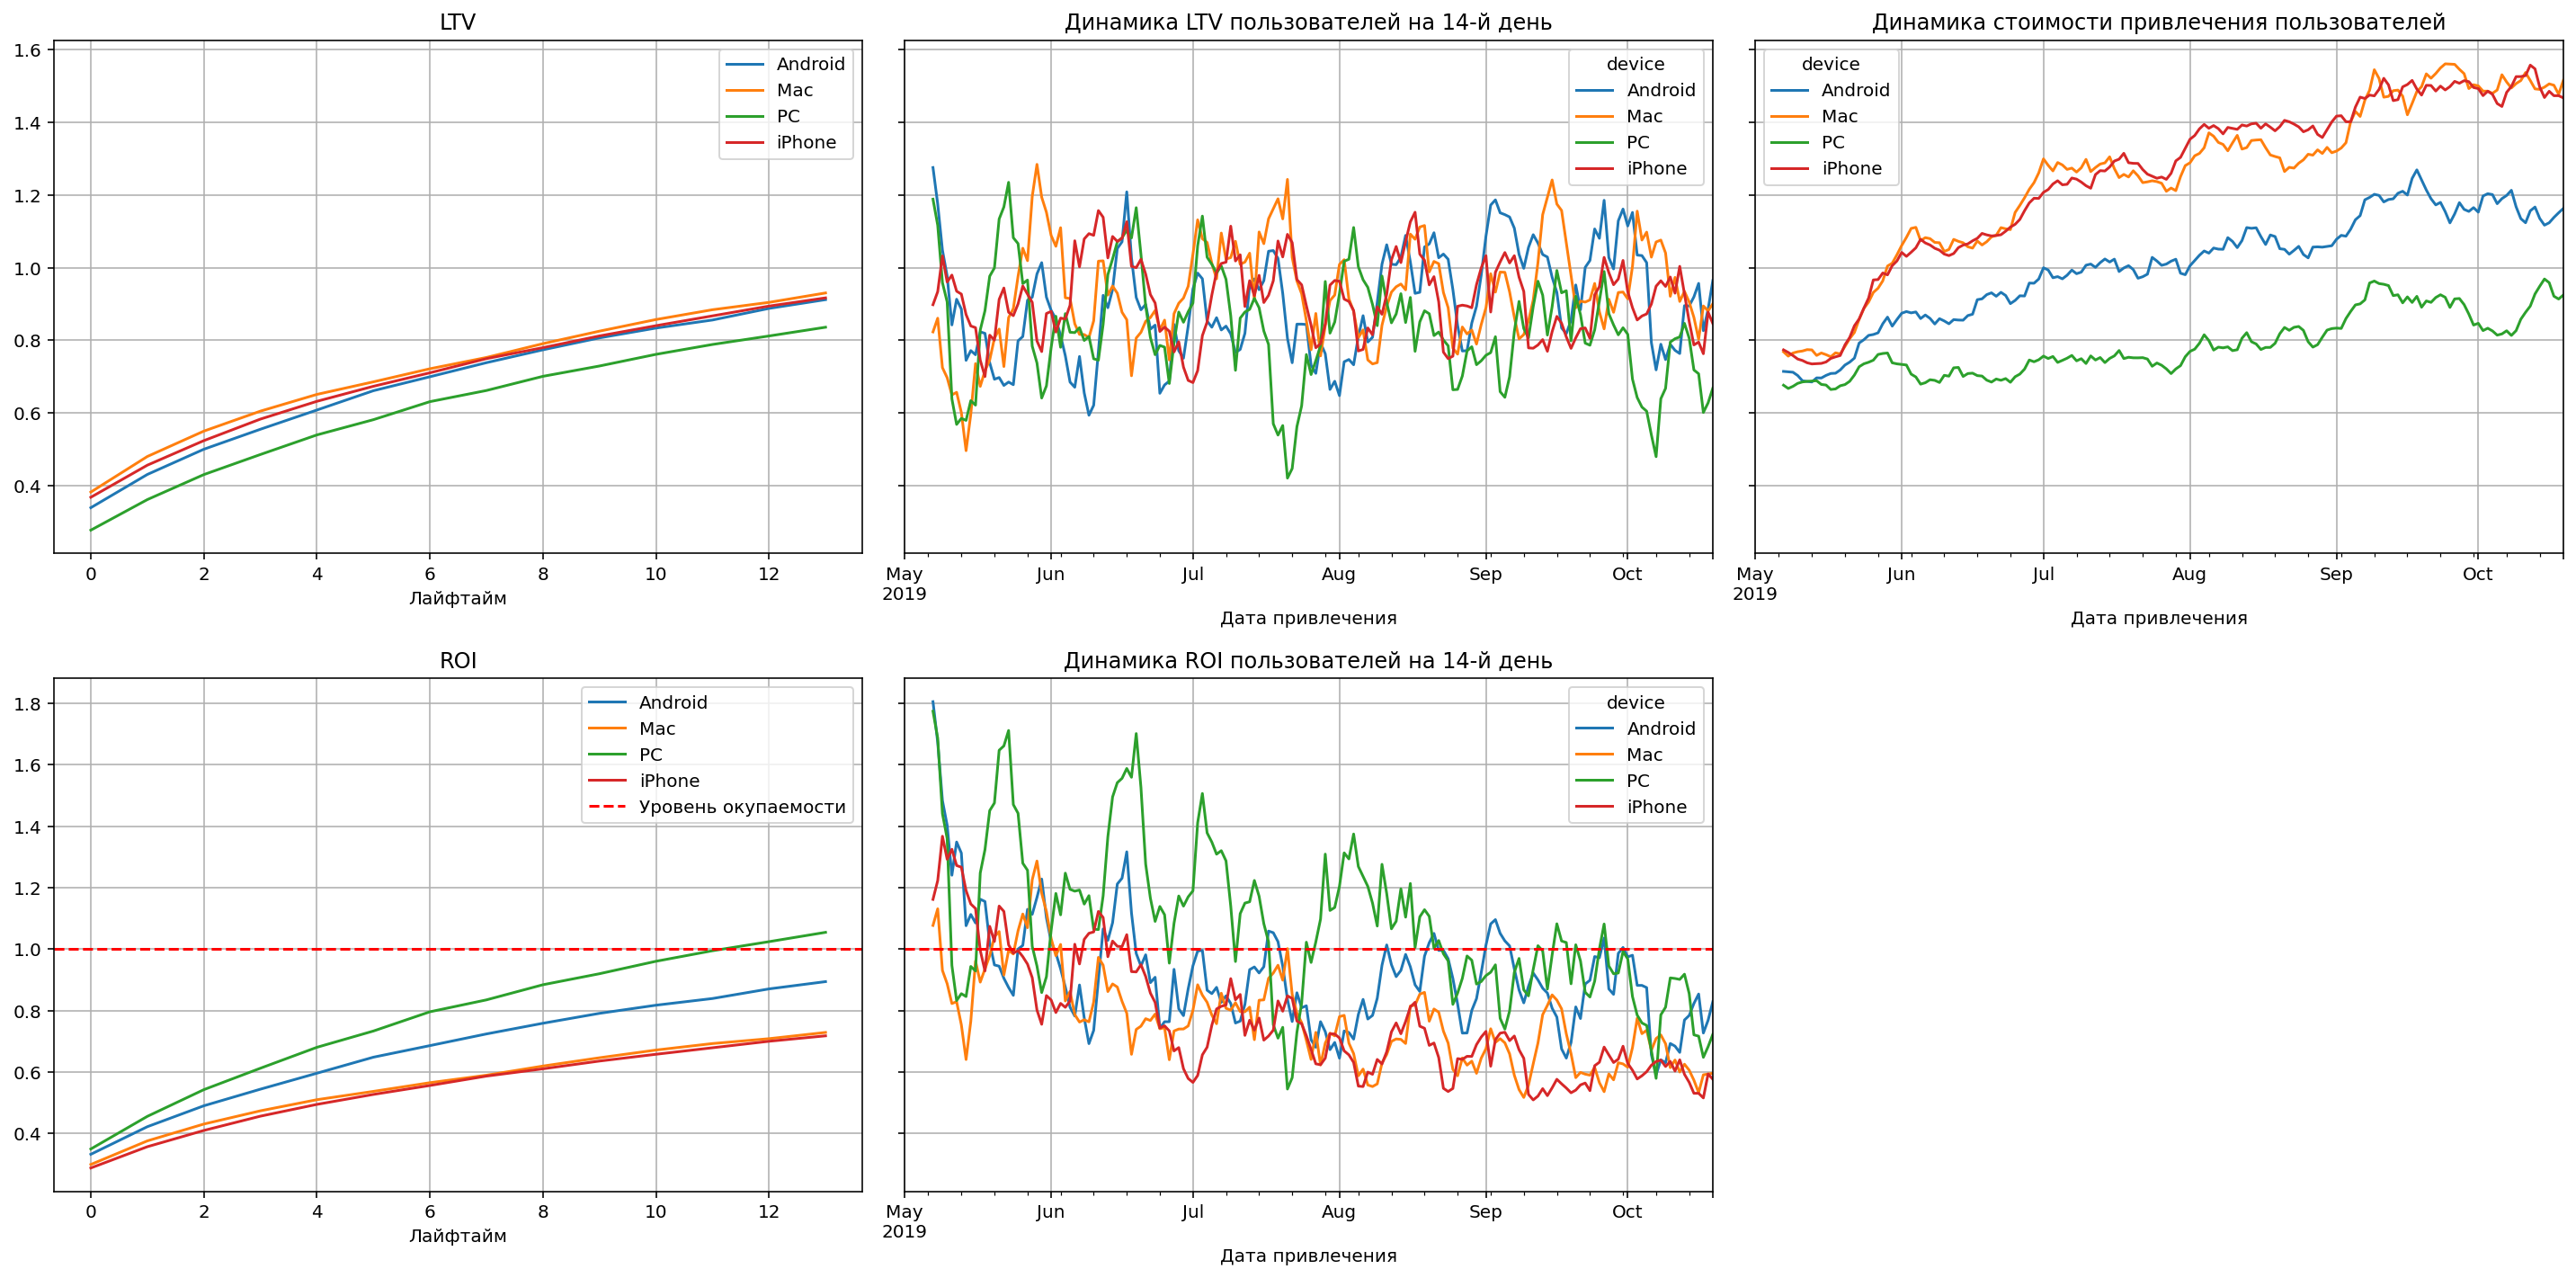

In [31]:
# построим графики
plot_ltv_roi(ltv_device, ltv_history_device, roi_device, roi_history_device, horizon_days, window=7)

Больше всего пользователей приходят с iPhone. Пользователей остальных устройств примерно равное количество (Android немного больше, чем РС и МАС).  
**график LTV**  
Доходность каждого клиента растёт каждый лайфтайм: и это характерно для всех устройств, пользователи на РС приносят немного меньше дохода, чем пользователи остальных устройств.  
**график ROI**  
Привлечение пользователей iPhone и Мас не окупается вовсе, пользователи на РС окупаются на 8-й день, а Android на 12-й.  
**график динамики LTV**  
Динамика LTV на 14-й день примерно одинаковая для всех устройств, однако есть разнонаправленные пики, но в целом трудно выявить какие-то закономерные различия.  
**график динамики ROI**  
У пользователей iPhone окупаемость самая низкая: после середины июля пользователи iPhone не окупаются даже к 14 дню, т.к. ROI не достигает единицы.  
По графику динамики окупаемости на 14-й день видно, что привлечение пользователей на РС самое лучшее - линия практически на всём промежутке выше 1. Динамика Мас и Android больше напоминает iPhone.  
**график динамики САС**  
Затраты на привлечение пользователей iPhone и Мас сильно выросли в конце мая и росли ежемесячно. Затраты на пользователей РС самые низкие, но и они росли в динамике.
  
**Итак, самые важные пользователи - iPhone, но окупаемость их привлечения самая низкая.**

### Проанализируем окупаемость рекламы с разбивкой по странам

In [32]:
result_raw_region, ltv_region, ltv_history_region, roi_region, roi_history_region = get_ltv(profiles,
                                                                                            orders,
                                                                                            observation_date,
                                                                                            horizon_days,
                                                                                            dimensions=['region'])
display(ltv_region)
display(roi_region)

cohort_size    0.0    1.0    2.0    3.0    4.0    5.0    6.0  \
region                                                                        
France               10516 0.1934 0.2598 0.3117 0.3602 0.4069 0.4502 0.4810   
Germany               9030 0.1863 0.2589 0.3279 0.3755 0.4228 0.4609 0.4969   
UK                   10536 0.2187 0.2968 0.3676 0.4166 0.4655 0.5040 0.5561   
United States        58562 0.4203 0.5196 0.5910 0.6518 0.7035 0.7479 0.7877   

                 7.0    8.0    9.0   10.0   11.0   12.0   13.0  
region                                                          
France        0.5072 0.5415 0.5709 0.6000 0.6219 0.6499 0.6703  
Germany       0.5341 0.5711 0.6054 0.6415 0.6659 0.6914 0.7130  
UK            0.5856 0.6237 0.6455 0.6688 0.6923 0.7198 0.7435  
United States 0.8259 0.8599 0.8939 0.9235 0.9508 0.9764 1.0013

cohort_size    cac    0.0    1.0    2.0    3.0    4.0    5.0  \
region                                                                        
France               10516 0.4598 0.4206 0.5649 0.6778 0.7833 0.8849 0.9790   
Germany               9030 0.4649 0.4008 0.5568 0.7054 0.8076 0.9094 0.9914   
UK                   10536 0.4549 0.4807 0.6523 0.8081 0.9158 1.0233 1.1078   
United States        58562 1.4559 0.2887 0.3569 0.4059 0.4477 0.4832 0.5137   

                 6.0    7.0    8.0    9.0   10.0   11.0   12.0   13.0  
region                                                                 
France        1.0461 1.1030 1.1776 1.2415 1.3049 1.3524 1.4133 1.4576  
Germany       1.0689 1.1488 1.2284 1.3021 1.3799 1.4324 1.4871 1.5337  
UK            1.2224 1.2873 1.3711 1.4190 1.4702 1.5218 1.5822 1.6343  
United States 0.5410 0.5673 0.5906 0.6140 0.6343 0.6531 0.6706 0.6878

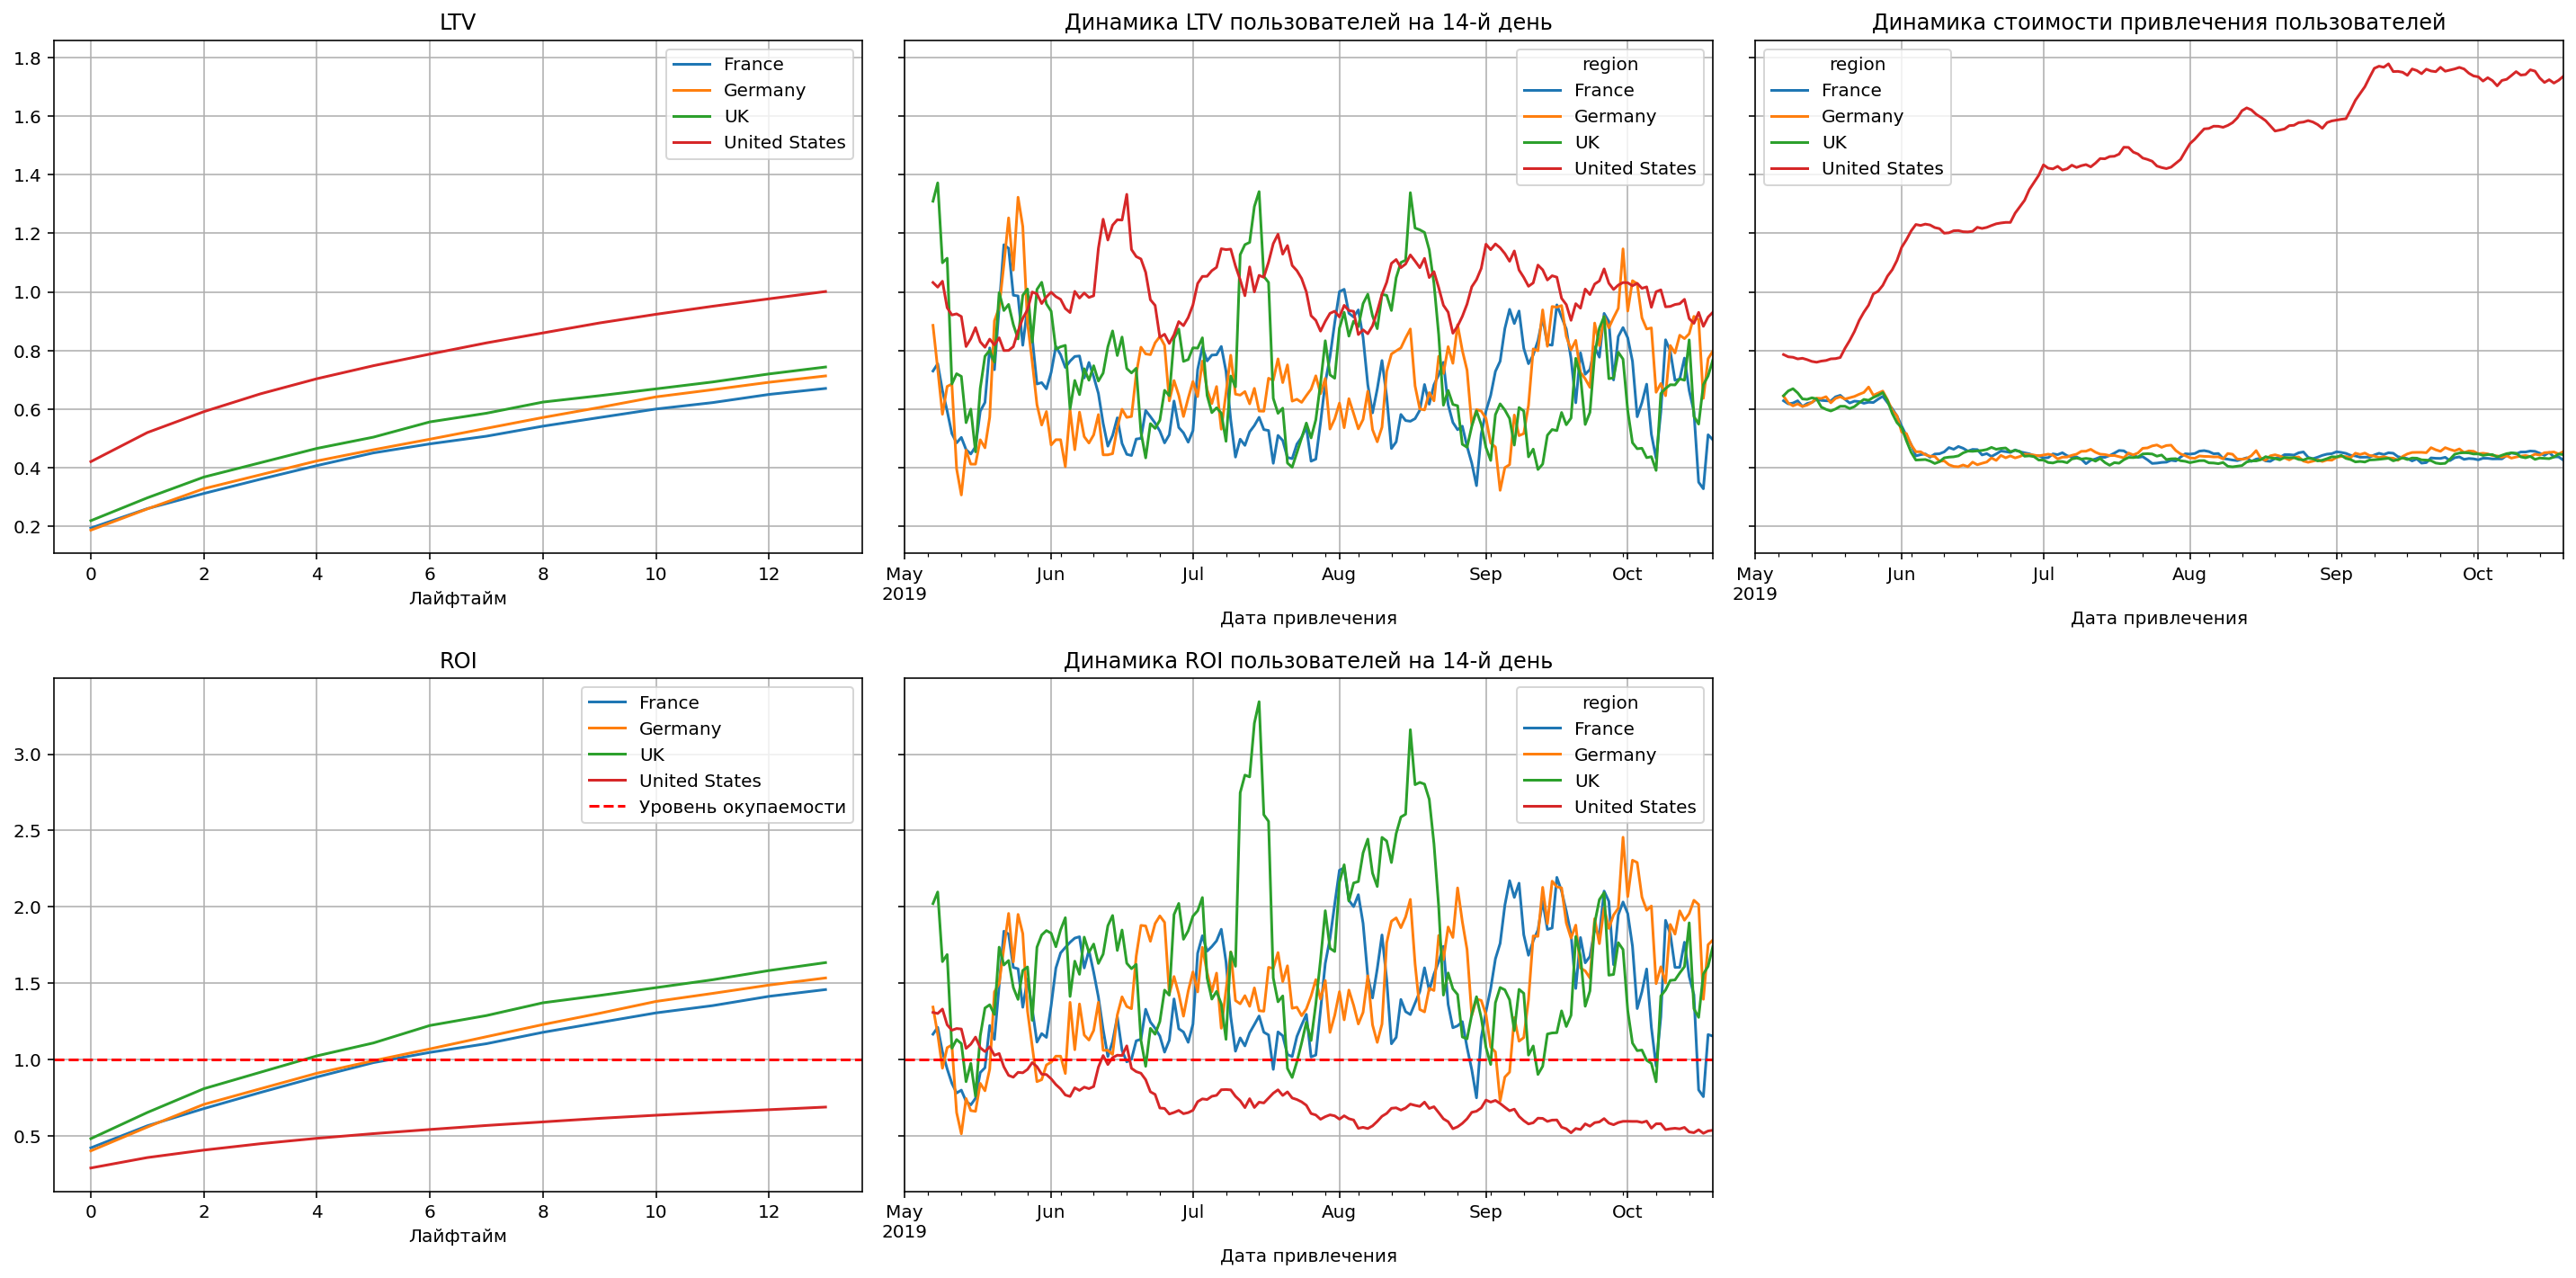

In [33]:
# построим графики
plot_ltv_roi(ltv_region, ltv_history_region, roi_region, roi_history_region, horizon_days, window=7)

Больше всего пользователей приходят из США - 58562. Пользователей из остальных стран примерно равное количество (Germany немного меньше, чем UK и France).  
**график LTV**  
Доходность каждого клиента растёт каждый лайфтайм: и это характерно для всех стран, пользователи из США приносят больше дохода, чем пользователи остальных стран.  
**график ROI**  
Привлечение пользователей из Germany, UK и France окупается уже на 5-6 день, а вот пользователи из США не окупаются даже на 14-й.  
**график динамики LTV**  
Динамика LTV на 14-й день показывает, что пользователи из США приносят больше дохода компании, чем пользователи из других стран, а меньше всего - пользователи из Франции.   
**график динамики ROI**  
После середины июня пользователи из США не окупаются даже к 14 дню, т.к. ROI не достигает единицы.  
По графику динамики окупаемости на 14-й день видно, что привлечение остальных пользователей окупается к 14 дню всегда. **график динамики САС**  
Привлечение пользователей из США - самое дорогое, оно значительно (более чем в 4 раза) превышает остальные страны.
  
**Итак, самые важные пользователи - из США - их больше всего и их доходность самая высокая, но издержки по их привлечению сильно высокие.**

### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам

In [34]:
result_raw_channel, ltv_channel, ltv_history_channel, roi_channel, roi_history_channel = get_ltv(profiles,
                                                                                                 orders,
                                                                                                 observation_date,
                                                                                                 horizon_days,
                                                                                                 dimensions=['channel'])
display(ltv_channel.sort_values(by=13, ascending=False))
display(roi_channel.sort_values(by='cohort_size', ascending=False))

cohort_size    0.0    1.0    2.0    3.0    4.0    5.0  \
channel                                                                     
lambdaMediaAds             2056 0.4603 0.6453 0.7788 0.9055 1.0415 1.1604   
TipTop                    18498 0.3435 0.4974 0.6241 0.7398 0.8424 0.9357   
RocketSuperAds             4251 0.2076 0.3186 0.3961 0.4560 0.5156 0.5710   
WahooNetBanner             8082 0.1913 0.2915 0.3789 0.4438 0.5169 0.5695   
AdNonSense                 3702 0.5050 0.5891 0.6444 0.6835 0.7067 0.7326   
FaceBoom                  27544 0.5857 0.6608 0.7007 0.7288 0.7471 0.7604   
YRabbit                    4102 0.1633 0.2134 0.2560 0.3039 0.3563 0.3879   
MediaTornado               4167 0.1375 0.1916 0.2469 0.2937 0.3322 0.3670   
LeapBob                    8103 0.1070 0.1557 0.2056 0.2354 0.2597 0.2886   
OppleCreativeMedia         8139 0.0972 0.1316 0.1717 0.2066 0.2411 0.2662   

                      6.0    7.0    8.0    9.0   10.0   11.0   12.0   13.0  
channel                                                                     
lambdaMediaAds     1.2624 1.3522 1.4449 1.5056 1.5793 1.6303 1.6959 1.7663  
TipTop             1.0137 1.0964 1.1714 1.2455 1.3114 1.3715 1.4276 1.4879  
RocketSuperAds     0.6391 0.6873 0.7380 0.7901 0.8314 0.8643 0.8986 0.9338  
WahooNetBanner     0.6319 0.6782 0.7254 0.7655 0.8125 0.8493 0.8895 0.9186  
AdNonSense         0.7541 0.7676 0.7892 0.8027 0.8070 0.8151 0.8272 0.8380  
FaceBoom           0.7747 0.7848 0.7924 0.8008 0.8062 0.8122 0.8175 0.8215  
YRabbit            0.4147 0.4390 0.4609 0.4803 0.5022 0.5241 0.5463 0.5597  
MediaTornado       0.3885 0.4185 0.4400 0.4616 0.4855 0.5083 0.5263 0.5337  
LeapBob            0.3146 0.3338 0.3695 0.3942 0.4176 0.4379 0.4576 0.4730  
OppleCreativeMedia 0.2902 0.3095 0.3285 0.3469 0.3642 0.3766 0.3950 0.4091

cohort_size    cac    0.0    1.0    2.0    3.0    4.0  \
channel                                                                     
FaceBoom                  27544 1.1134 0.5260 0.5935 0.6293 0.6546 0.6710   
TipTop                    18498 2.7578 0.1246 0.1804 0.2263 0.2683 0.3054   
OppleCreativeMedia         8139 0.2499 0.3891 0.5265 0.6870 0.8268 0.9648   
LeapBob                    8103 0.2100 0.5098 0.7414 0.9790 1.1209 1.2364   
WahooNetBanner             8082 0.6019 0.3179 0.4843 0.6296 0.7373 0.8588   
RocketSuperAds             4251 0.4174 0.4973 0.7633 0.9489 1.0923 1.2352   
MediaTornado               4167 0.2190 0.6277 0.8748 1.1274 1.3407 1.5169   
YRabbit                    4102 0.2171 0.7522 0.9831 1.1792 1.4000 1.6411   
AdNonSense                 3702 1.0080 0.5010 0.5845 0.6393 0.6781 0.7011   
lambdaMediaAds             2056 0.7272 0.6329 0.8873 1.0709 1.2452 1.4321   

                      5.0    6.0    7.0    8.0    9.0   10.0   11.0   12.0  \
channel                                                                      
FaceBoom           0.6829 0.6958 0.7048 0.7117 0.7192 0.7241 0.7295 0.7342   
TipTop             0.3393 0.3676 0.3976 0.4248 0.4516 0.4755 0.4973 0.5177   
OppleCreativeMedia 1.0654 1.1610 1.2386 1.3147 1.3883 1.4574 1.5070 1.5806   
LeapBob            1.3743 1.4980 1.5895 1.7597 1.8770 1.9885 2.0852 2.1791   
WahooNetBanner     0.9462 1.0499 1.1268 1.2052 1.2719 1.3500 1.4112 1.4779   
RocketSuperAds     1.3679 1.5311 1.6464 1.7679 1.8928 1.9918 2.0705 2.1527   
MediaTornado       1.6754 1.7738 1.9105 2.0090 2.1074 2.2167 2.3206 2.4026   
YRabbit            1.7868 1.9101 2.0222 2.1230 2.2127 2.3136 2.4145 2.5164   
AdNonSense         0.7268 0.7481 0.7615 0.7829 0.7963 0.8006 0.8086 0.8206   
lambdaMediaAds     1.5957 1.7358 1.8593 1.9868 2.0703 2.1717 2.2418 2.3319   

                     13.0  
channel                    
FaceBoom           0.7378  
TipTop             0.5395  
OppleCreativeMedia 1.6371  
LeapBob            2.2524  
WahooNetBanner     1.5263  
RocketSuperAds     2.2370  
MediaTornado       2.4365  
YRabbit            2.5781  
AdNonSense         0.8313  
lambdaMediaAds     2.4287

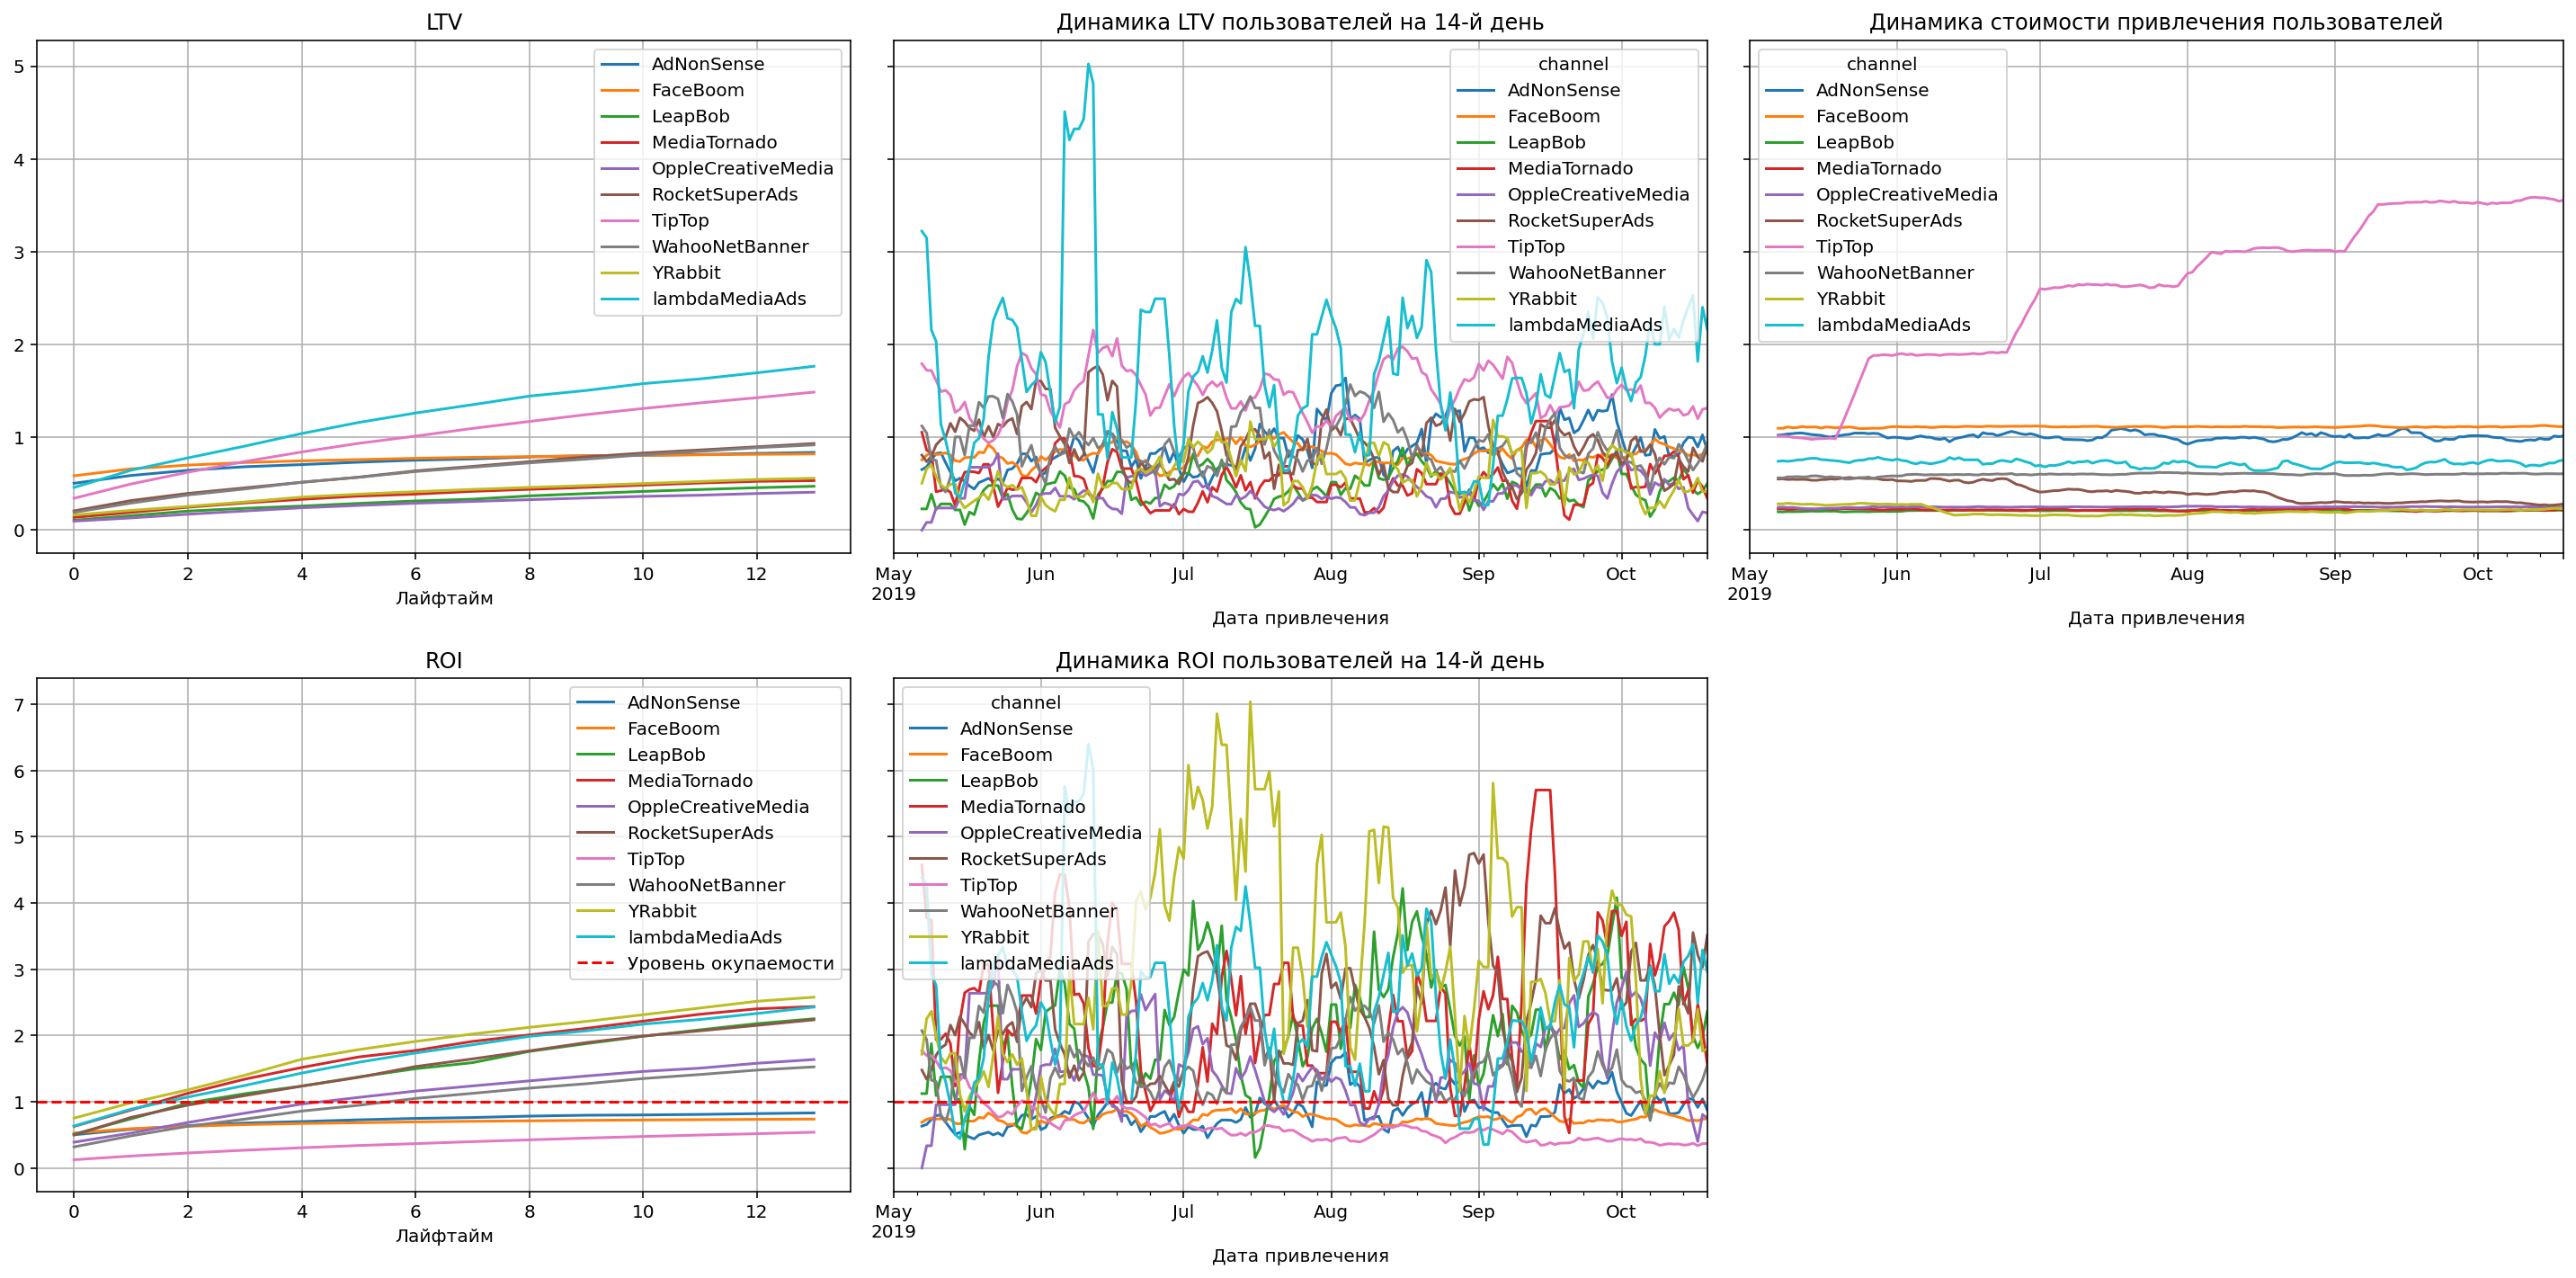

In [35]:
# построим графики
plot_ltv_roi(ltv_channel, ltv_history_channel, roi_channel, roi_history_channel, horizon_days, window=7)

Больше всего пользователей приходят из FaceBoom и TipTop - 27544 и 18498. Пользователей из каналов OppleCreativeMedia, LeapBob, WahooNetBanner примерно равное количество - около 8000, остальные 5 каналов привели менее 4300 пользователей каждый.  
**график LTV**  
Самые доходные поьзователи приходят с каналов lambdaMediaAds и TipTop. Далее по доходности - RocketSuperAds и WahooNetBanner.  Доходность каждого клиента растёт каждый лайфтайм: и это характерно для всех каналов. Самый низкий рост у OppleCreativeMedia и LeapBob.  
**график ROI**  
Привлечение пользователей из  каналов AdNonSense, FaceBoom и TipTop не окупаются даже на 14-й день.  
**график динамики LTV**  
Динамика LTV на 14-й день показывает, что пользователи, которые пришли из каналов lambdaMediaAds и TipTop самые доходные на протяжении всего периода. Динамика остальных примерно в одинаковом диапазоне: от 0 до 1 (1,5).   
**график динамики ROI**  
в начале июня максимальная окупаемость была у канала lambdaMediaAds, с середины июня и до середины августа - YRabbit, далее до конца периода в лидеры вышли MediaTornado вместе с YRabbit.   
По графику динамики окупаемости на 14-й день видно, что привлечение пользователей через каналы TipTop, FaceBoom и AdNonSense не окупаются даже к 14 дню всегда.  
**график динамики САС**  
Привлечение пользователей через TipTop - самое дорогое, оно значительно (более чем в 3,5 раза) превышает следующий канал по стоимости привлечения FaceBoom, а также растёт каждый месяц. Остальные каналы показывают стабильность затрат.  
  
**Можно утверждать, что каналы привлечения пользователей - TipTop, FaceBoom и AdNonSense - убыточны, т.к., несмотря на большое количество пользователей, приходящих через эти каналы, затраты слишком высоки и не покрываются доходом от новых пользователей. Перспективные каналы - YRabbit, lambdaMediaAds и MediaTornado**

## Построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам. 

### Строим графики удержания

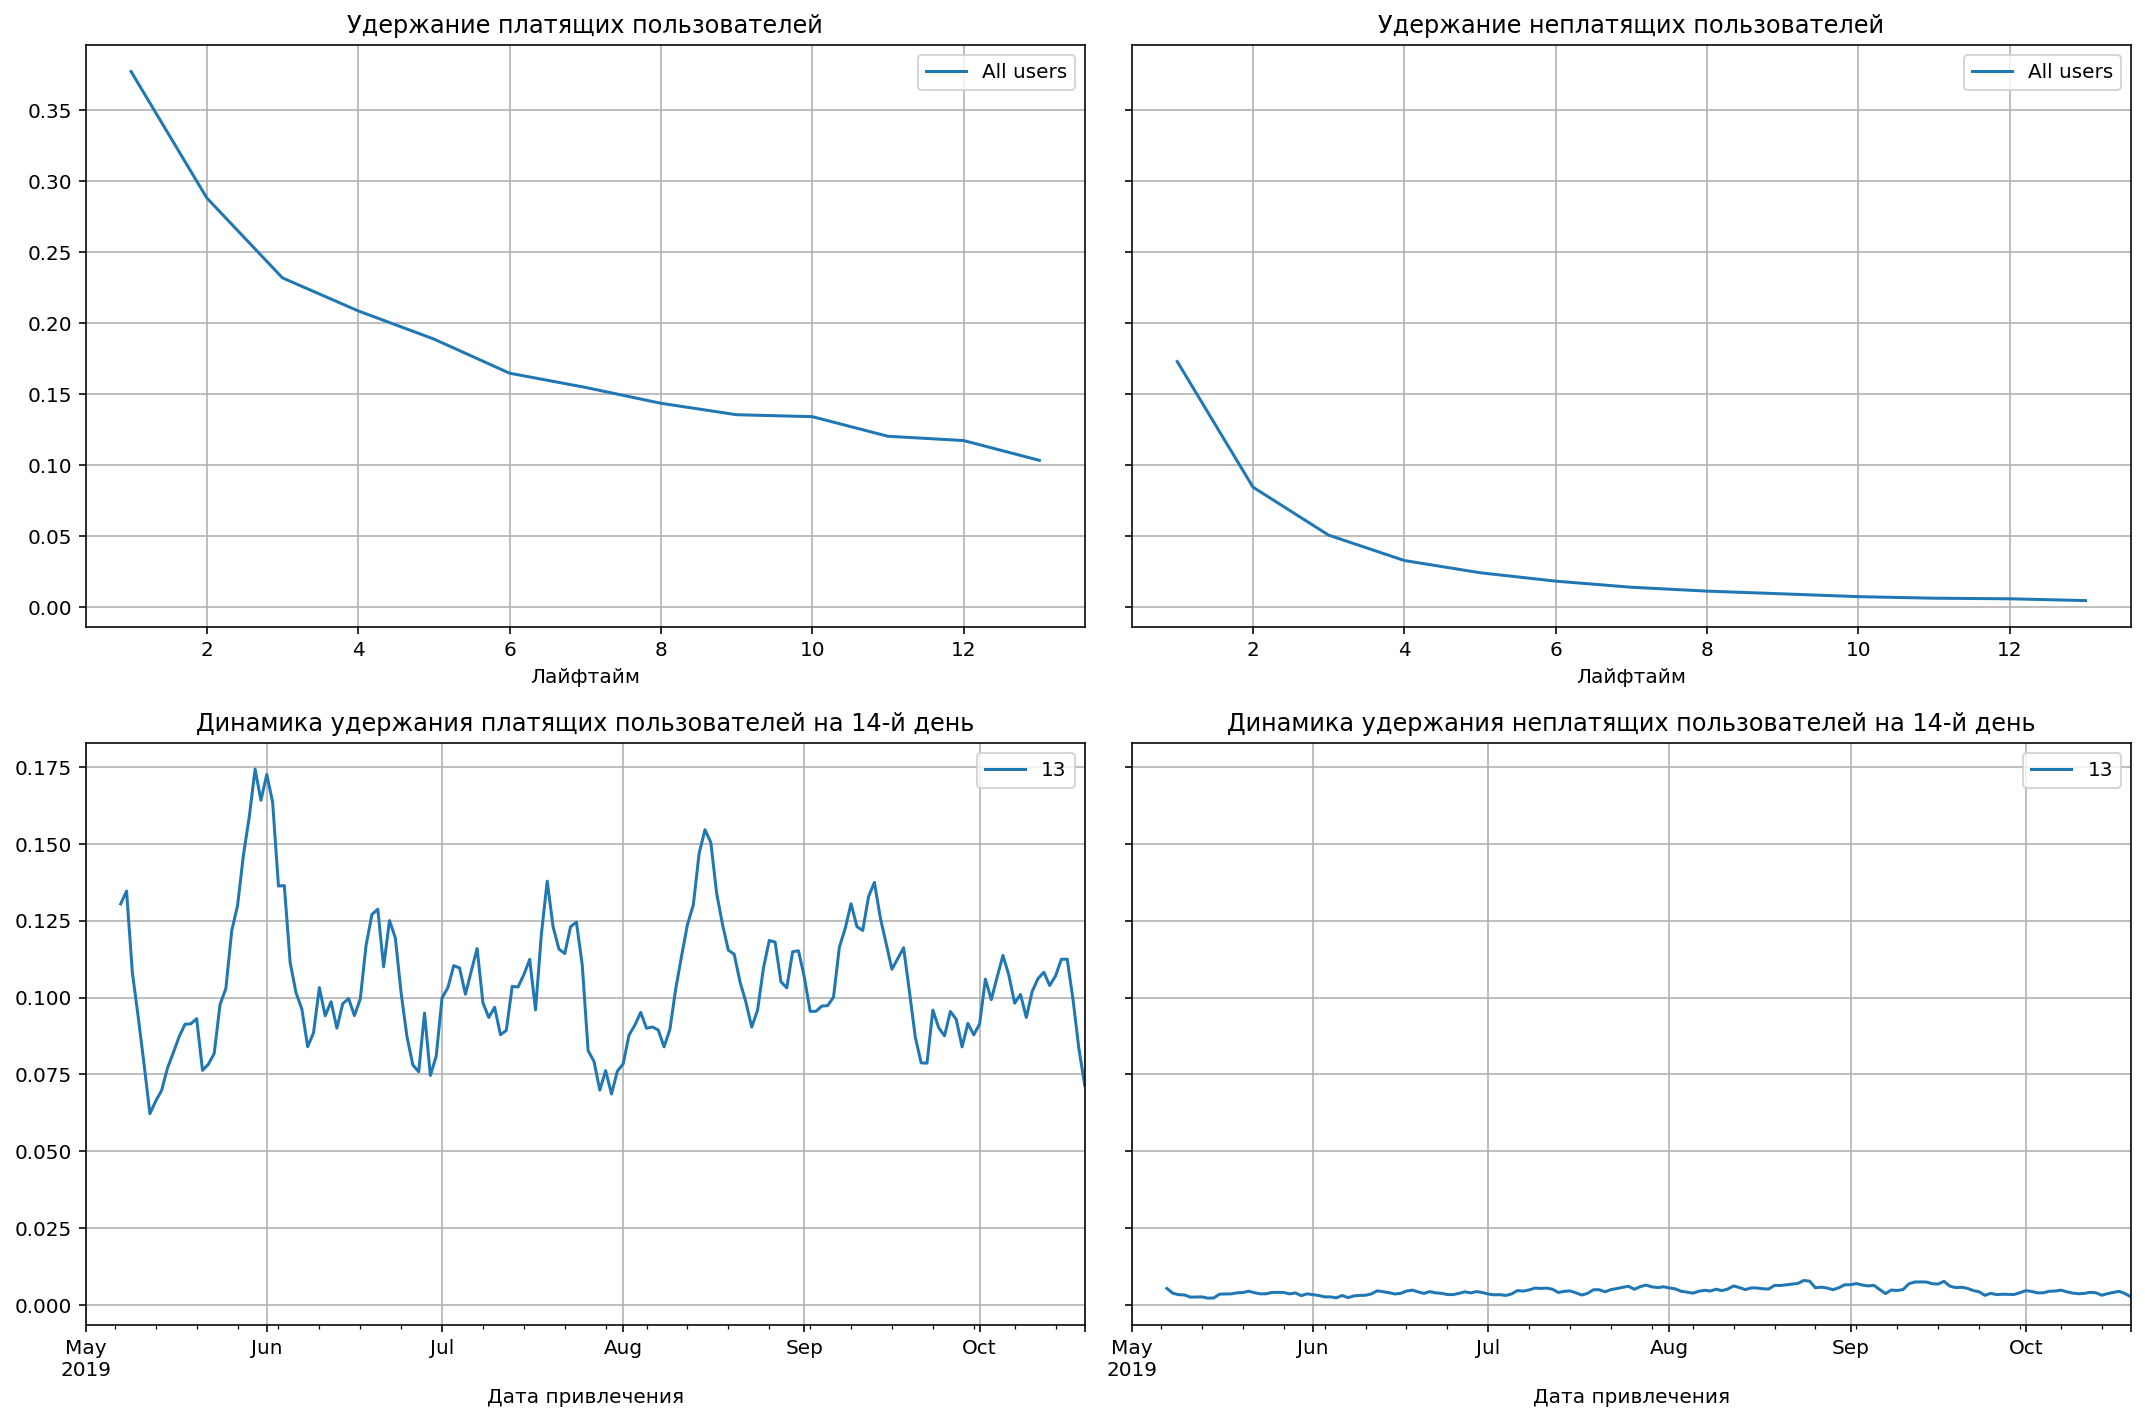

In [36]:
retention_raw, retention_grouped, retention_history = get_retention(
                                                                    profiles,
                                                                    visits,
                                                                    observation_date,
                                                                    horizon_days,
                                                                    dimensions=[],
                                                                    ignore_horizon=False,
                                                                    )
plot_retention(retention_grouped, retention_history, horizon_days, window=7)

Удержание платящих пользователей резко снижается с 0 по 4 лайфтайм, потом снижение плвное: всего с 0,23 до 0,1.  
Удержание неплатящих пользователей к 14-му дню практически нулевое.  
Динамика удержания платящих пользователей стабильна около уровня 0,1.  
Динамика удержания неплатящих пользователей стабильно низкая.

Построим графики удержания с разбивкой по устройствам

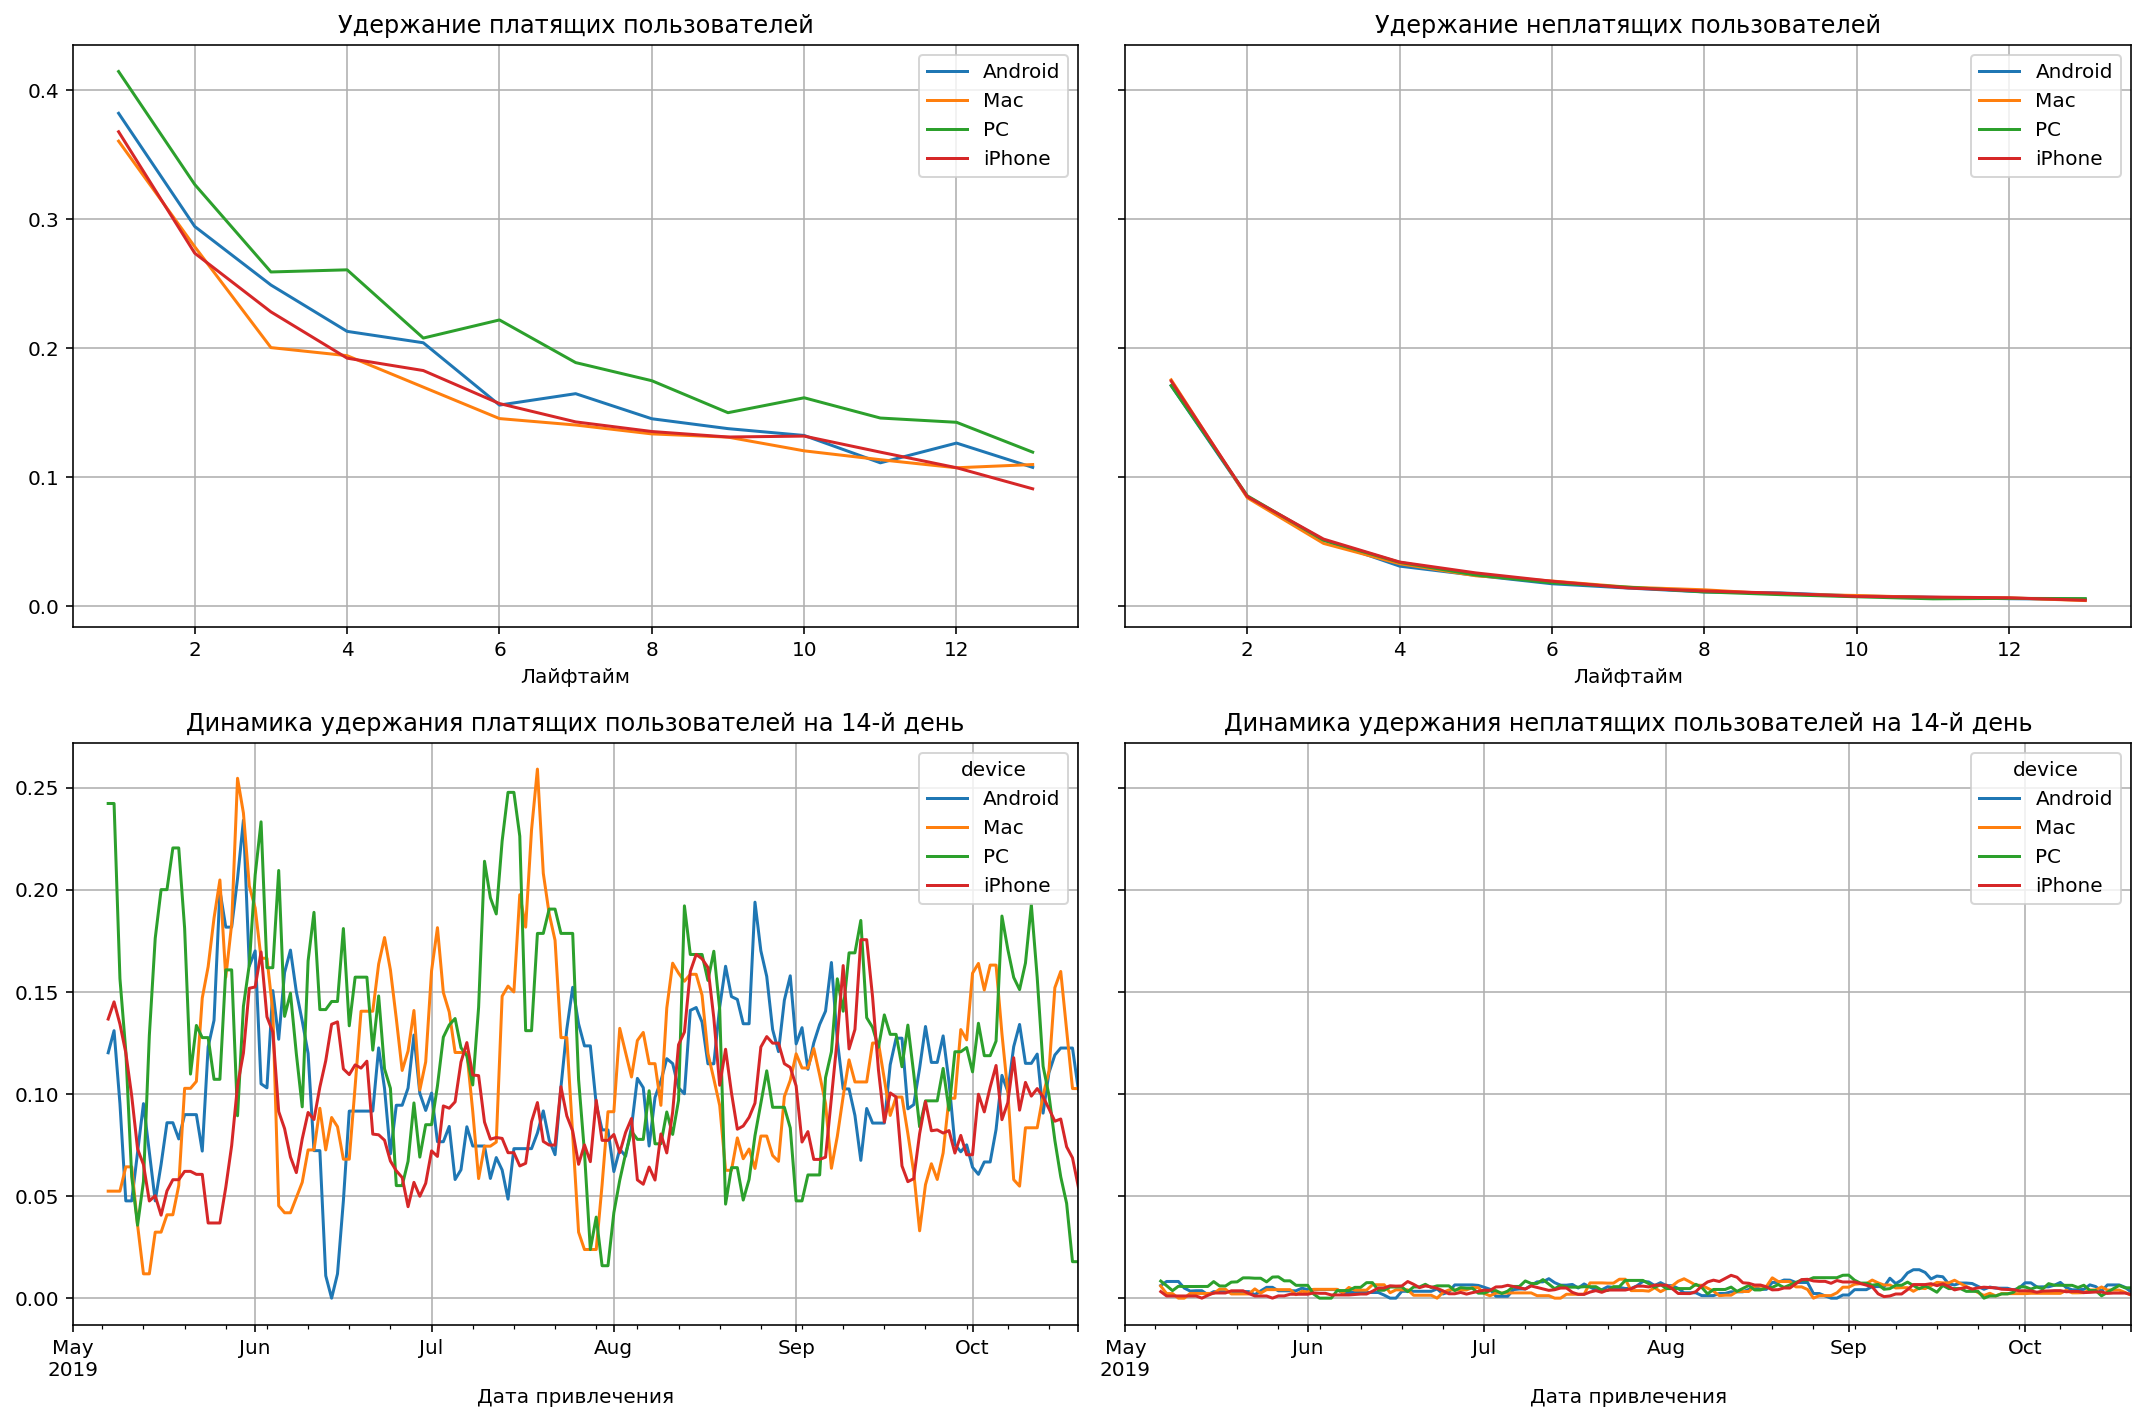

In [37]:
retention_raw_device, retention_grouped_device, retention_history_device = get_retention(
                                                                                            profiles,
                                                                                            visits,
                                                                                            observation_date,
                                                                                            horizon_days,
                                                                                            dimensions=['device'],
                                                                                            ignore_horizon=False,
                                                                                        )
plot_retention(retention_grouped_device, retention_history_device, horizon_days, window=7)

Удержание платящих пользователей на РС выше на всех лайфтаймах, чем на других устройствах, значит, приложение нравится им больше.   
Удержание неплатящих пользователей не различается в зависимости от устройства.  
В динамике удержания платящих пользователей можно выделить 2 промежутка: до августа - явно лидировали РС и Мас, а после - с небольшими коллебаниями все устройства практически сравнялись.  
Динамика удержания неплатящих пользователей стабильно низкая и одинаковая для всех устройств.

Построим графики удержания с разбивкой по странам

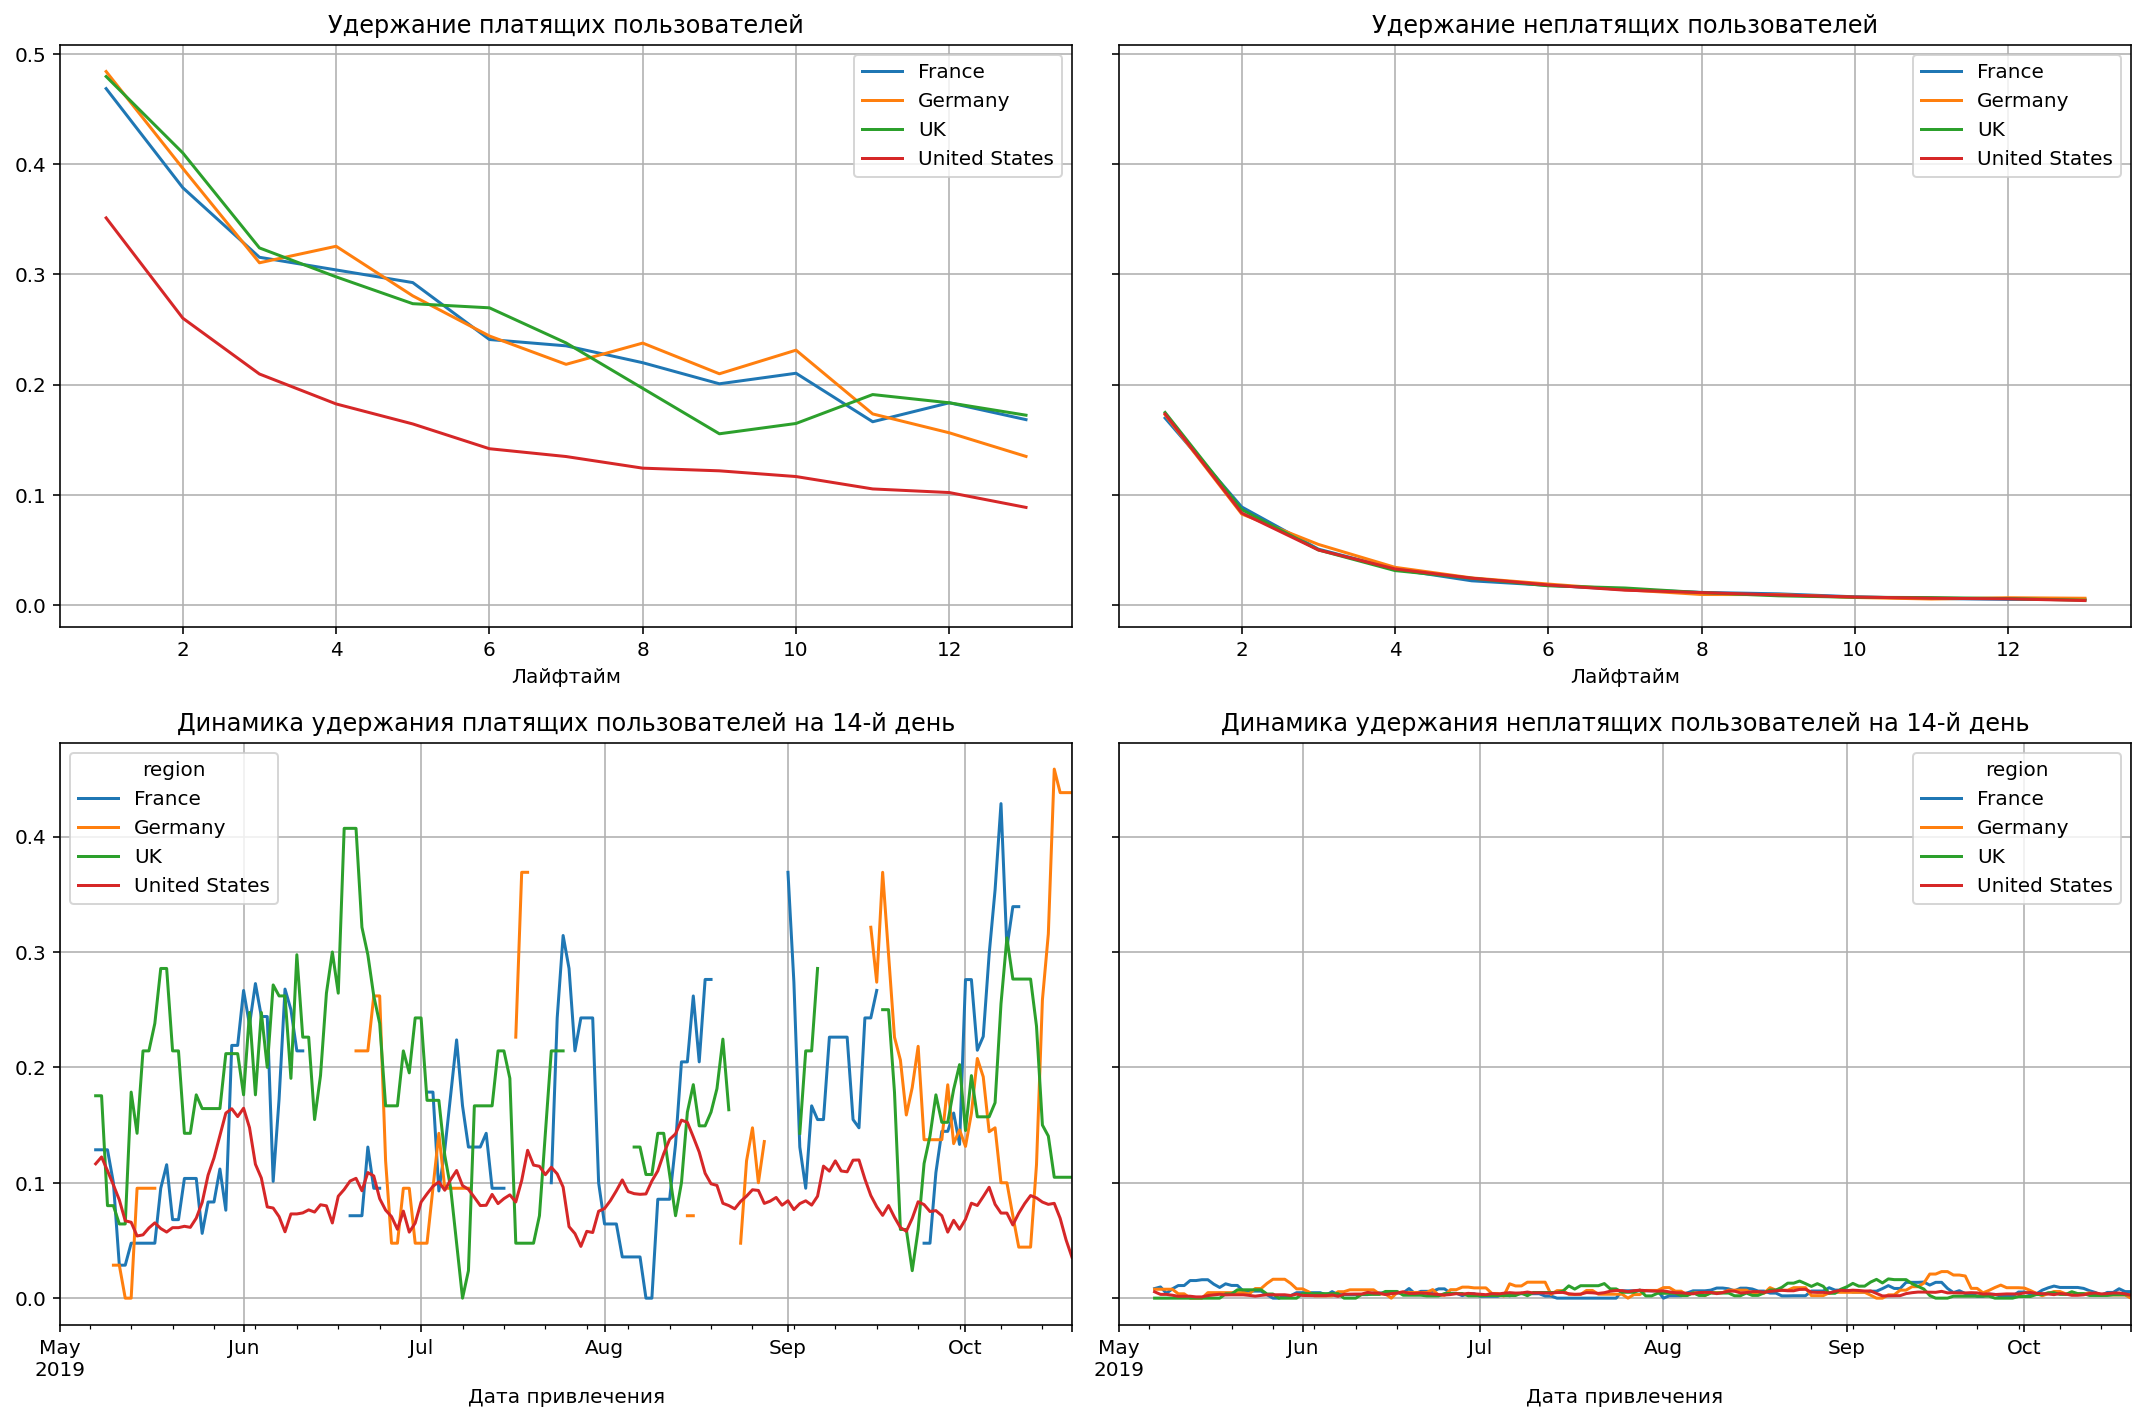

In [38]:
retention_raw_region, retention_grouped_region, retention_history_region = get_retention(
                                                                                            profiles,
                                                                                            visits,
                                                                                            observation_date,
                                                                                            horizon_days,
                                                                                            dimensions=['region'],
                                                                                            ignore_horizon=False,
                                                                                        )
plot_retention(retention_grouped_region, retention_history_region, horizon_days, window=7)

Удержание платящих пользователей из США ниже других на всех лайфтаймах.   
Удержание неплатящих пользователей не различается в зависимости от региона.  
В динамике удержания платящих пользователей из США нет больших пиков, она стбильно низкая на всём промежутке, наибольшие пики у UK в середине мая, июня, августа и октября, а также у Франции - в начале сентября и октября.  
Динамика удержания неплатящих пользователей стабильно низкая и одинаковая для всех стран.  
**Самые нужные пользователи удерживаются хуже всего**

Построим графики удержания с разбивкой по рекламным каналам

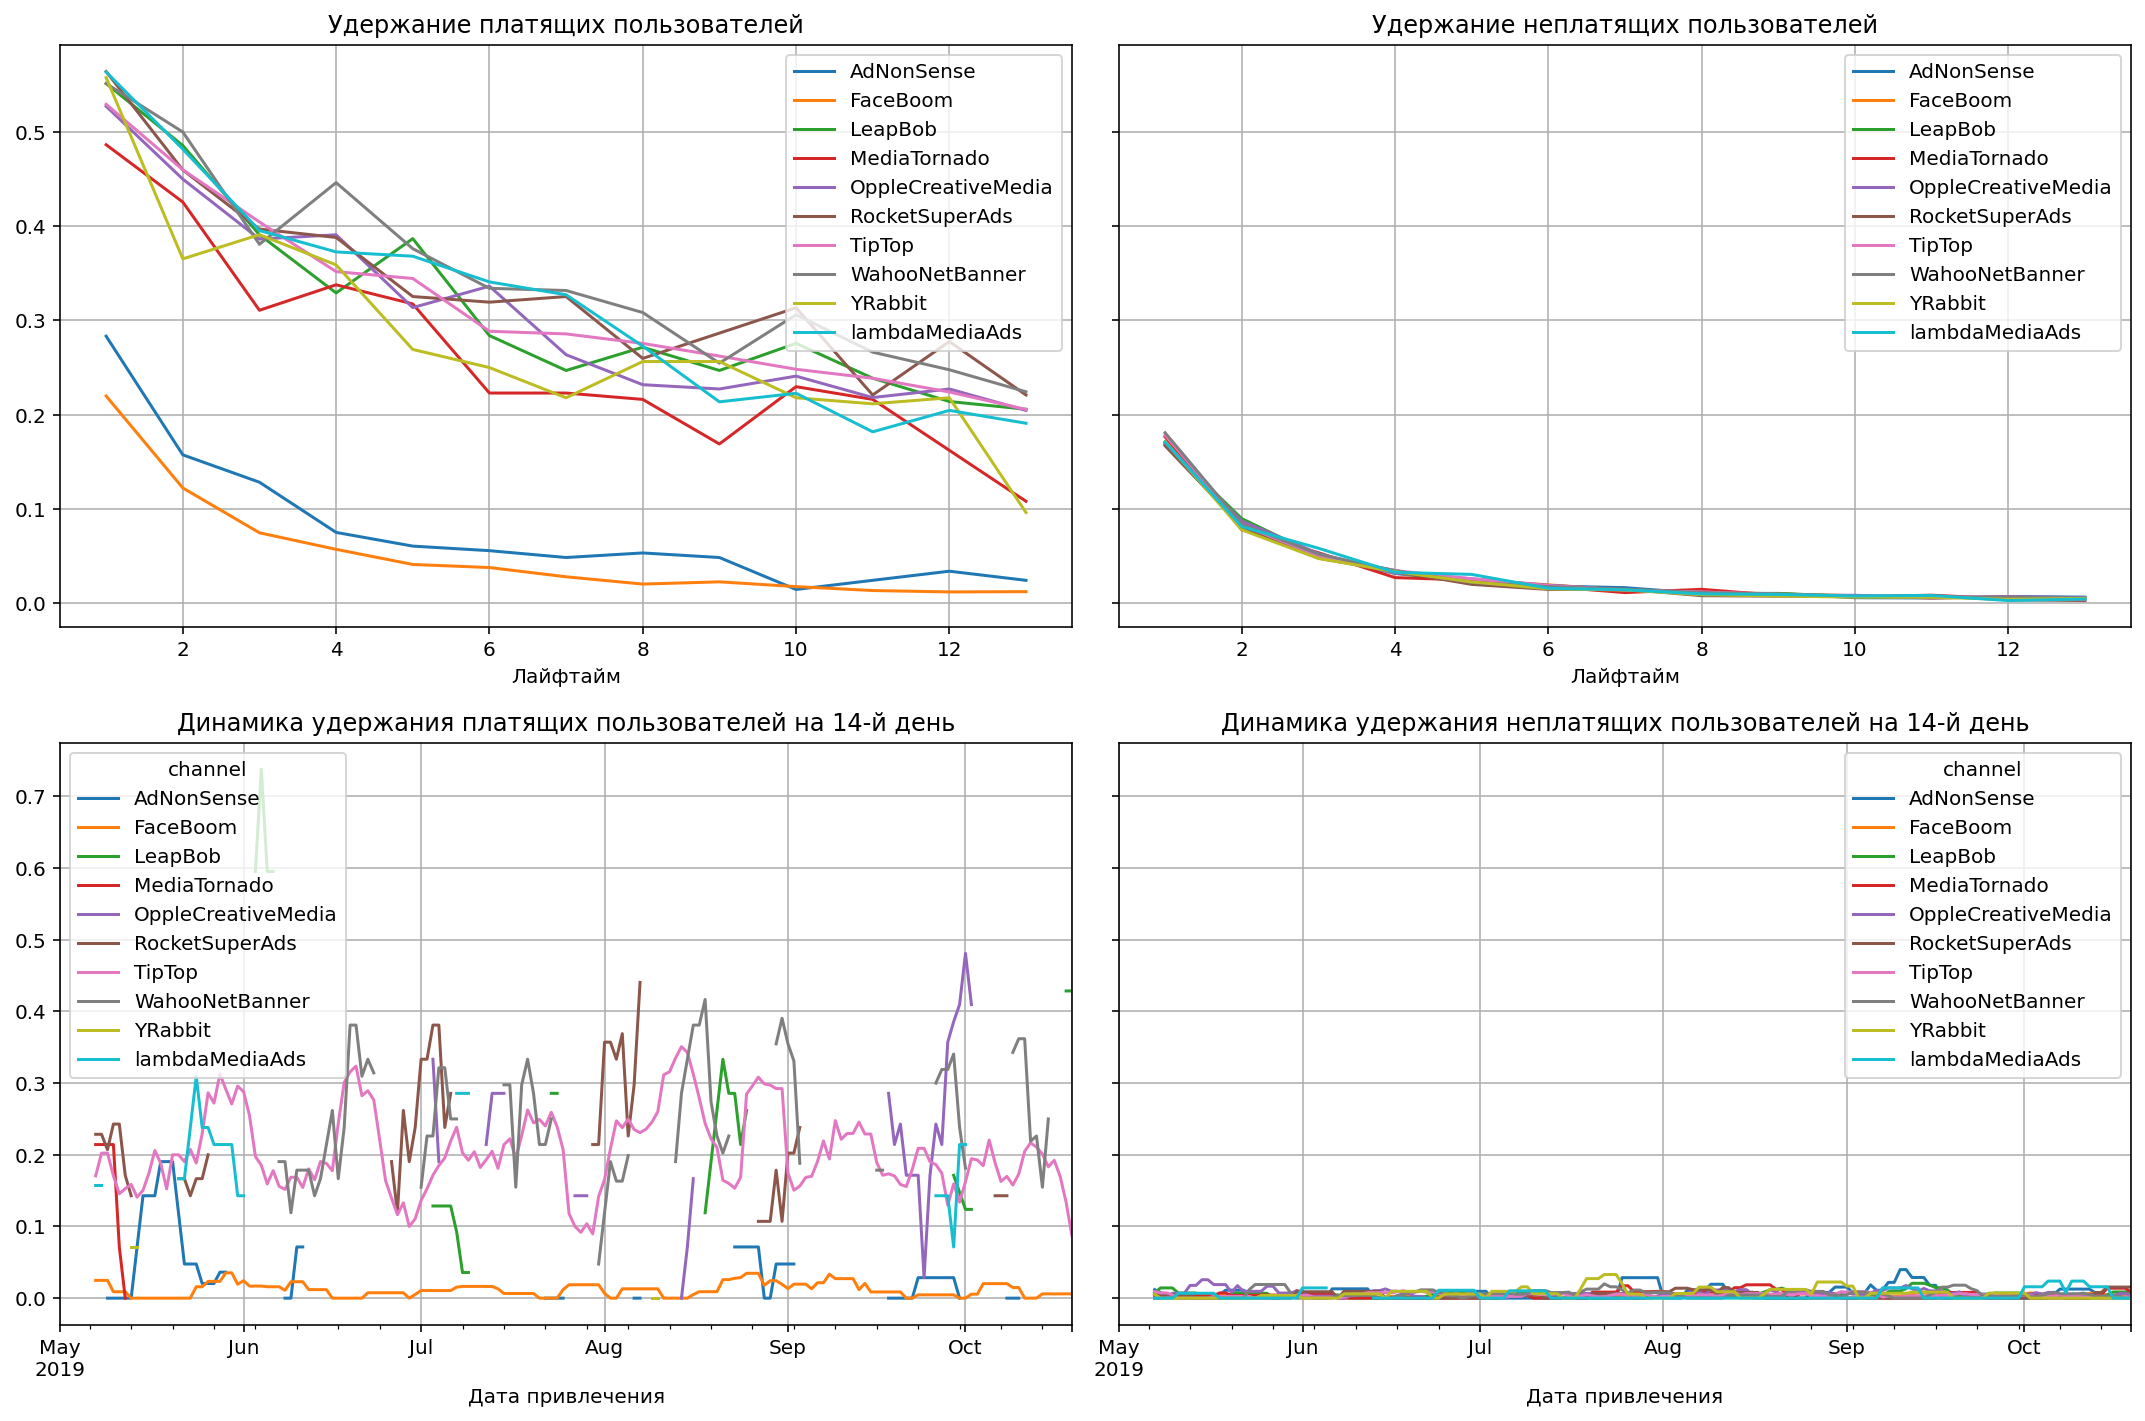

In [39]:
retention_raw_channel, retention_grouped_channel, retention_history_channel = get_retention(
                                                                                            profiles,
                                                                                            visits,
                                                                                            observation_date,
                                                                                            horizon_days,
                                                                                            dimensions=['channel'],
                                                                                            ignore_horizon=False,
                                                                                        )
plot_retention(retention_grouped_channel, retention_history_channel, horizon_days, window=7)

Удержание платящих пользователей из каналов AdNonSense и FaceBoom самые низкие: уже на первый лайфтайм удержание пользователей в два раза ниже, чем в среднем с других каналов.   
Удержание неплатящих пользователей не различается в зависимости от каналов.  
В динамике удержания платящих пользователей канал FaceBoom показал стабильно самые низкие результаты. Отметим пик в начале октября у канала WahooNetBanner. В остальном динамика стабильна, есть пики как вверх, так и вниз у всех каналов.  
Динамика удержания неплатящих пользователей стабильно низкая и одинаковая для всех стран.  
**FaceBoom - канал для быстрого привлечения новых и непостоянных пользователей**

### Строим графики коверсии

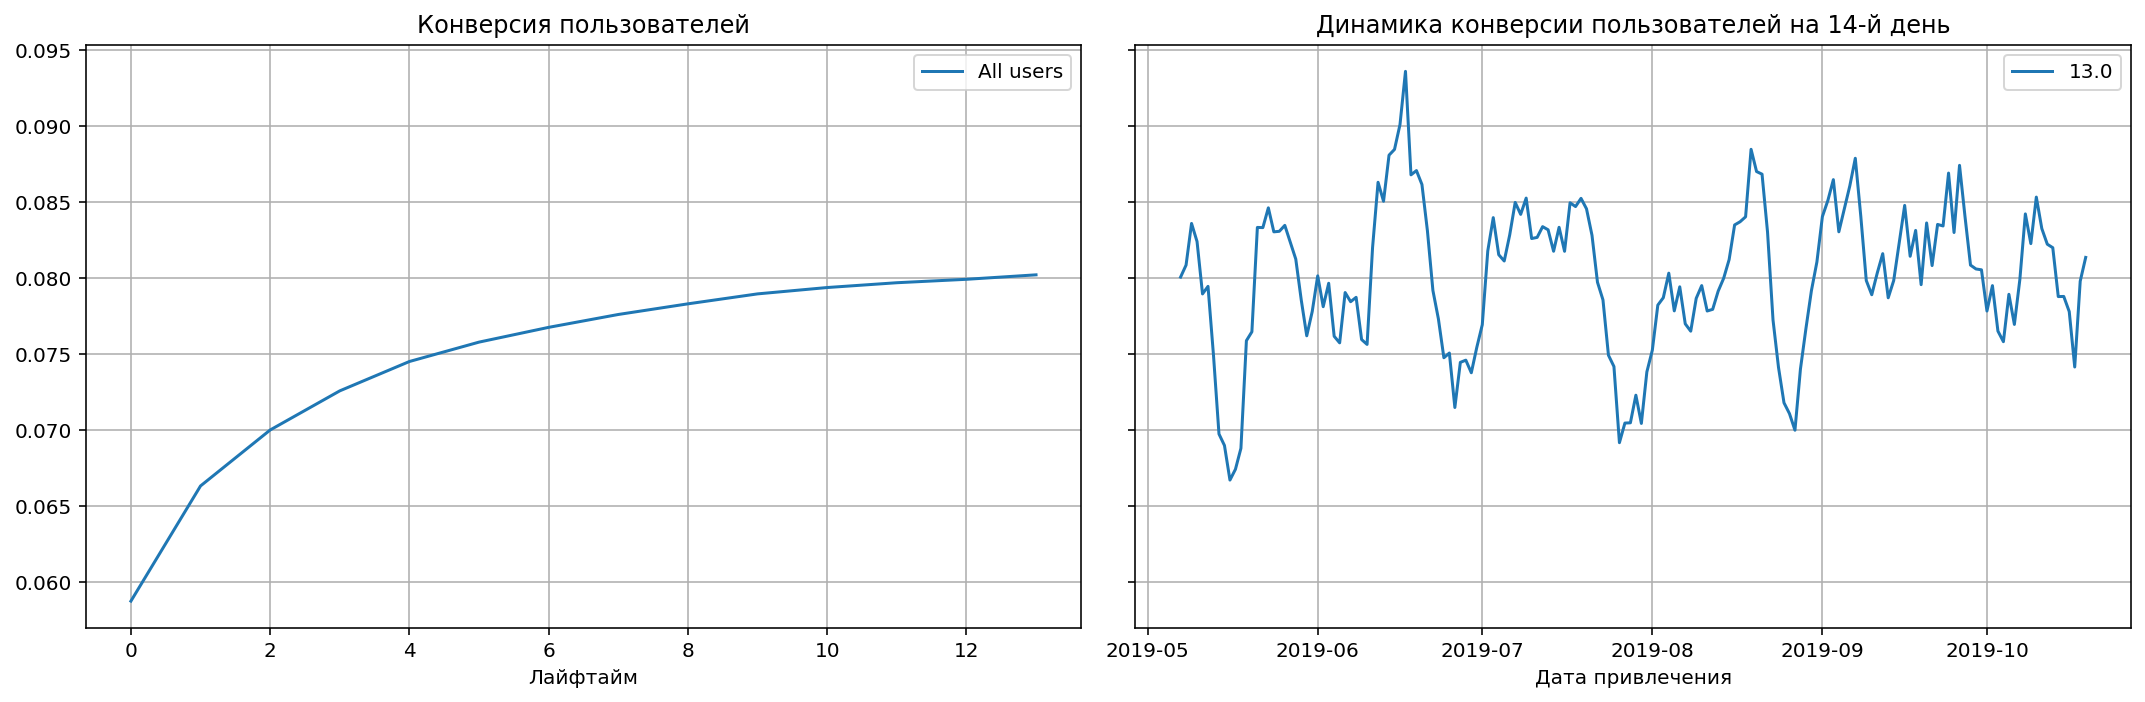

In [40]:
conversion_raw, conversion, conversion_history = get_conversion(
                                                                    profiles,
                                                                    orders,
                                                                    observation_date,
                                                                    horizon_days,
                                                                    dimensions=[],
                                                                    ignore_horizon=False,
                                                                )
plot_conversion(conversion, conversion_history, horizon_days, window=7)

Конверсия растёт с каждым лайтаймом, на 14-й день - 0,08, значит, доля людей, перешедших из обычного пользователя приложения в плательщика - 8 из 100.  
Отметим, что по графику динамики конверсии видны стабильные колебания около среднего - 0,08. 

Построим графики конверсии с разбивкой по устройствам

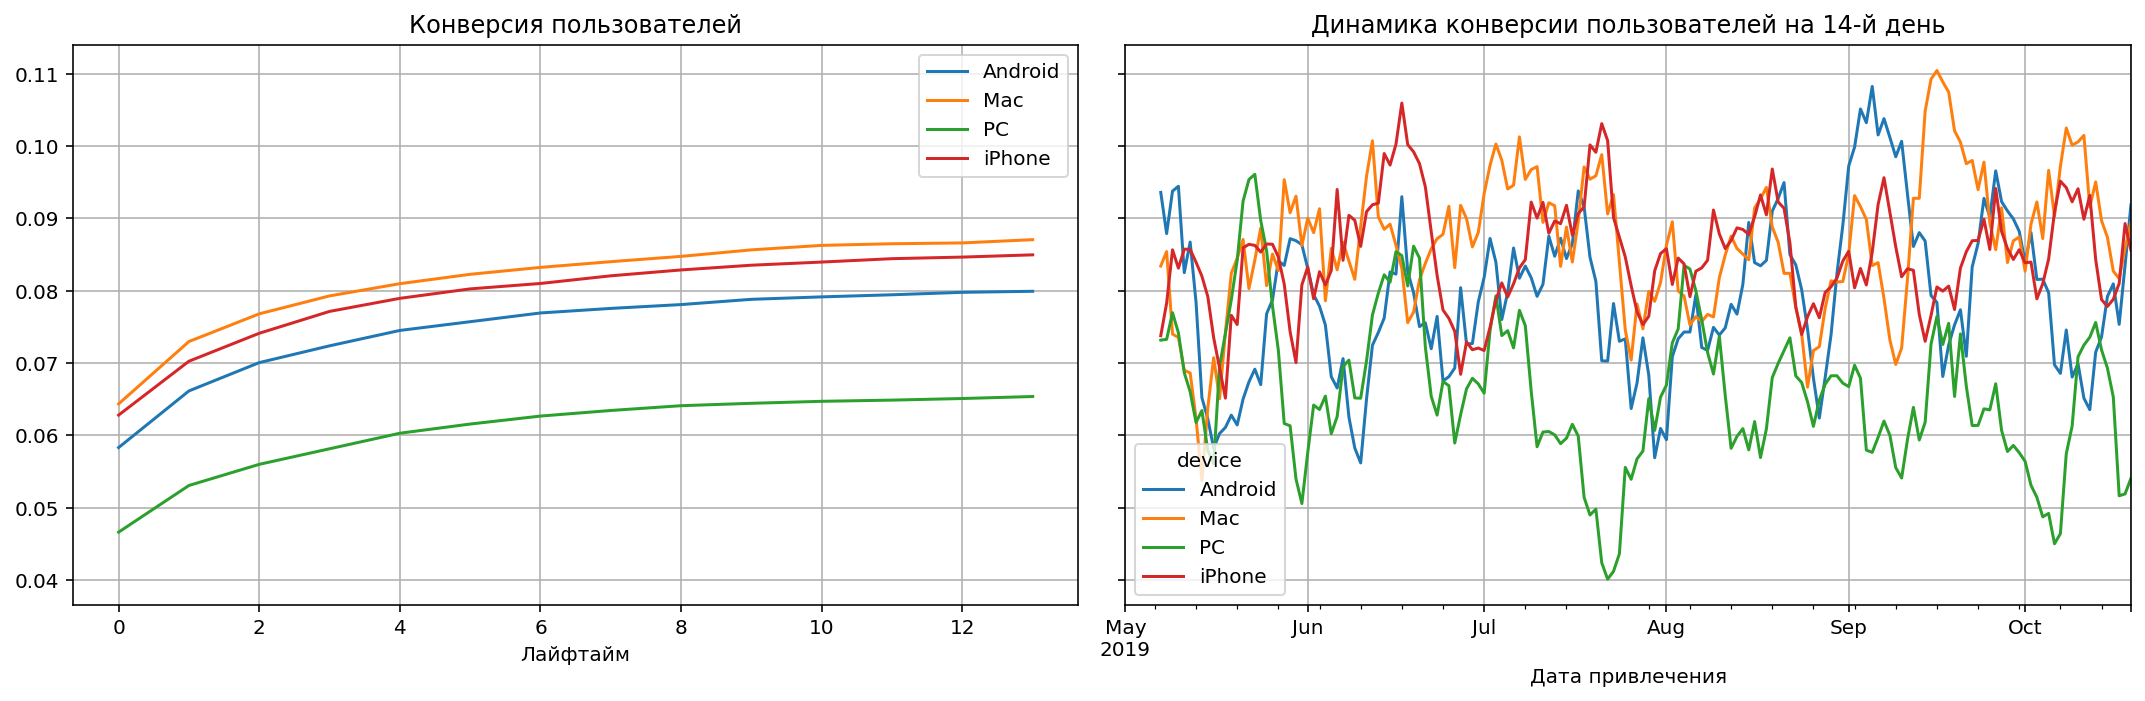

In [41]:
conversion_raw_device, conversion_device, conversion_history_device = get_conversion(
                                                                                        profiles,
                                                                                        orders,
                                                                                        observation_date,
                                                                                        horizon_days,
                                                                                        dimensions=['device'],
                                                                                        ignore_horizon=False,
                                                                                    )
plot_conversion(conversion_device, conversion_history_device, horizon_days, window=7)

Конверсия пользователей на РС самая низкая, а на Мас и iPhone - самые высокие.   
Динамика конверсии пользователей на РС низкая на протяжении всего периода. И снова на Мас и iPhone - самая высокая. 

Построим графики конверсии с разбивкой по странам

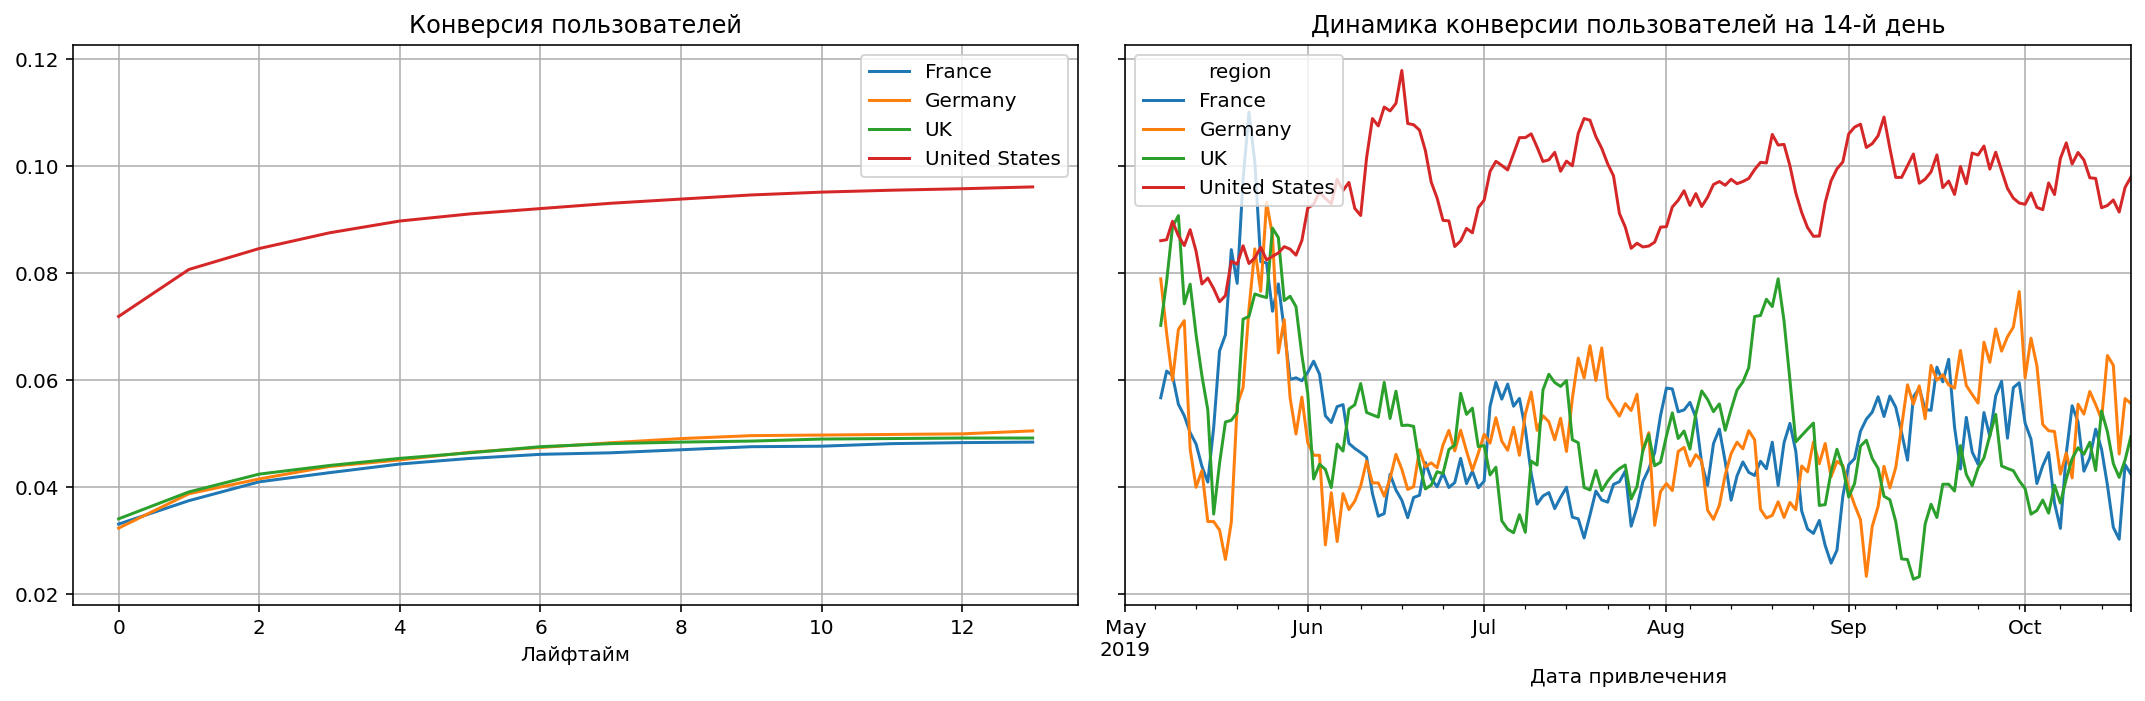

In [42]:
conversion_raw_region, conversion_region, conversion_history_region = get_conversion(
                                                                                        profiles,
                                                                                        orders,
                                                                                        observation_date,
                                                                                        horizon_days,
                                                                                        dimensions=['region'],
                                                                                        ignore_horizon=False,
                                                                                    )
plot_conversion(conversion_region, conversion_history_region, horizon_days, window=7)

Значительно превосходит конверсия пользователей из США конверсию поьзователей из других стран, которая примерно совпадает. Это видно и на любом лайфтайме и в динамике.

Построим графики конверсии с разбивкой по рекламным каналам

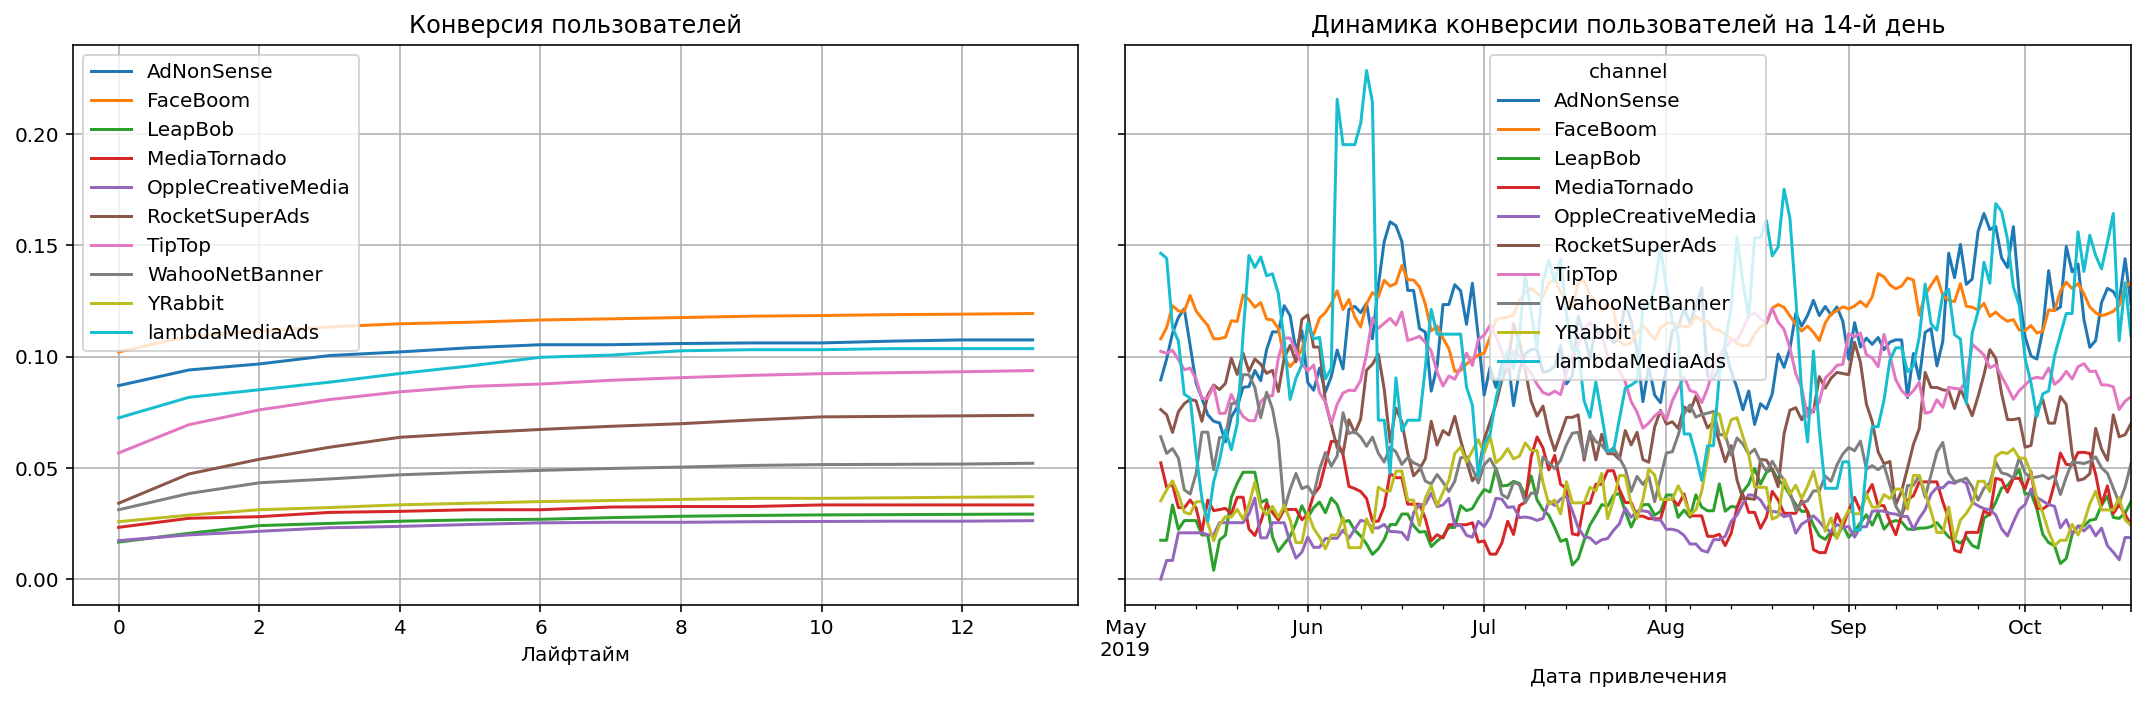

In [43]:
conversion_raw_channel, conversion_channel, conversion_history_channel = get_conversion(
                                                                                            profiles,
                                                                                            orders,
                                                                                            observation_date,
                                                                                            horizon_days,
                                                                                            dimensions=['channel'],
                                                                                            ignore_horizon=False,
                                                                                        )
plot_conversion(conversion_channel, conversion_history_channel, horizon_days, window=7)

Конверсия пользователей пришедших из FaceBoom, AdNonSense, lambdaMediaAds, TipTop и RocketSuperAds выше среднего уровня.  
Канал lambdaMediaAds выглядит перспективным, т.к. на графике его динамики наблюдаем много пиков максимума и в среднем этот канал даёт конверсию сравнимую с FaceBoom и TipTop.

### Вывод
**Окупается ли реклама в целом?** - Нет, т.к. показатель ROI ниже 1 во всех лайфтаймах.   
  
**Какие устройства, страны и каналы могут снижать окупаемость рекламы?** - Когортный анализ выявил следующие факторы, влияющие на окупаемость рекламы:  
1) со стороны используемого устройства - пользователи iPhone  
2) со стороны региона - пользователи из США   
3) со стороны каналов привлечения - пользователи, пришедшие из FaceBoom, TipTop и AdNonSense  
  
**Чем могут быть вызваны проблемы окупаемости?** - Причина: пользователей из этих когорт больше всего и они самые доходные, но издержки на их привлечения слишком высоки.    

# Шаг 4. Выводы
1) Причины неэффективности привлечения пользователей:  
* вложение средств в каналы FaceBoom, TipTop и AdNonSense, издержки по привлечению пользователей в которых больше, чем доходность приходящих клиентов,
* низкое удержание высококонверсируемых пользователей из США
  
  
2) Рекомендации для отдела маркетинга для повышения эффективности:  
* сосредоточиться на целевом сегменте - пользователи из США с устройством iPhone или Мас,  
* перераспределить средства с каналов FaceBoom, TipTop и AdNonSense в каналы - lambdaMediaAds, MediaTornado и YRabbit - окупаемость их рекламы выше, удержание пользователей примерно на одном уровне, лучшая конверсия у lambdaMediaAds.